# Let's Grow More (LGMVIP) - "DATA SCIENCE INTERN"

<font size="4">Author Reginold K Binoy</font>

## MORE ADVANCED LEVEL TASK

### Task 10 -Stock Market Prediction And Forecasting Using Stacked LSTM

Dataset Link https://www.kaggle.com/datasets/msambare/fer2013

# Importing Libraries

In [1]:
# Libraries for data processing
import numpy as np
import pandas as pd
import os

# Libraries for deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

import cv2

# Downloading Datasets

In [2]:
# Install Kaggle if not installed
!pip install kaggle

# Move the kaggle.json file to the correct directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset from Kaggle
!kaggle datasets download -d msambare/fer2013

# Unzip the dataset
!unzip fer2013.zip

cp: kaggle.json: No such file or directory
chmod: /Users/reginoldkbinoy/.kaggle/kaggle.json: No such file or directory
Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
 99%|█████████████████████████████████████▊| 60.0M/60.3M [00:27<00:00, 3.28MB/s]
100%|██████████████████████████████████████| 60.3M/60.3M [00:27<00:00, 2.33MB/s]
Archive:  fer2013.zip
  inflating: test/angry/PrivateTest_10131363.jpg  
  inflating: test/angry/PrivateTest_10304478.jpg  
  inflating: test/angry/PrivateTest_1054527.jpg  
  inflating: test/angry/PrivateTest_10590091.jpg  
  inflating: test/angry/PrivateTest_1109992.jpg  
  inflating: test/angry/PrivateTest_11296953.jpg  
  inflating: test/angry/PrivateTest_12000629.jpg  
  inflating: test/angry/PrivateTest_12008383.jpg  
  inflating: test/angry/PrivateTest_12191716.jpg  
  inflating: test/angry/PrivateTest_1221822.jpg  
  inflating: test/angry/PrivateTest_12403575.jpg  
  inflating: test/angry/PrivateTest_12766285.jpg  
  inf

  inflating: test/angry/PrivateTest_31352702.jpg  
  inflating: test/angry/PrivateTest_31554607.jpg  
  inflating: test/angry/PrivateTest_31560766.jpg  
  inflating: test/angry/PrivateTest_32282421.jpg  
  inflating: test/angry/PrivateTest_32298306.jpg  
  inflating: test/angry/PrivateTest_33031857.jpg  
  inflating: test/angry/PrivateTest_3309033.jpg  
  inflating: test/angry/PrivateTest_33237326.jpg  
  inflating: test/angry/PrivateTest_33363783.jpg  
  inflating: test/angry/PrivateTest_33469617.jpg  
  inflating: test/angry/PrivateTest_33585800.jpg  
  inflating: test/angry/PrivateTest_33643985.jpg  
  inflating: test/angry/PrivateTest_33725180.jpg  
  inflating: test/angry/PrivateTest_33746988.jpg  
  inflating: test/angry/PrivateTest_33861977.jpg  
  inflating: test/angry/PrivateTest_33951605.jpg  
  inflating: test/angry/PrivateTest_3411628.jpg  
  inflating: test/angry/PrivateTest_35186407.jpg  
  inflating: test/angry/PrivateTest_35198928.jpg  
  inflating: test/angry/PrivateTe

  inflating: test/angry/PublicTest_37316865.jpg  
  inflating: test/angry/PublicTest_37905989.jpg  
  inflating: test/angry/PublicTest_37985095.jpg  
  inflating: test/angry/PublicTest_37985773.jpg  
  inflating: test/angry/PublicTest_38165746.jpg  
  inflating: test/angry/PublicTest_38216771.jpg  
  inflating: test/angry/PublicTest_39092344.jpg  
  inflating: test/angry/PublicTest_39135751.jpg  
  inflating: test/angry/PublicTest_40202990.jpg  
  inflating: test/angry/PublicTest_40341899.jpg  
  inflating: test/angry/PublicTest_40690128.jpg  
  inflating: test/angry/PublicTest_40811515.jpg  
  inflating: test/angry/PublicTest_40824482.jpg  
  inflating: test/angry/PublicTest_4105485.jpg  
  inflating: test/angry/PublicTest_41416509.jpg  
  inflating: test/angry/PublicTest_4237118.jpg  
  inflating: test/angry/PublicTest_4263322.jpg  
  inflating: test/angry/PublicTest_42826491.jpg  
  inflating: test/angry/PublicTest_43169549.jpg  
  inflating: test/angry/PublicTest_43316380.jpg  
  i

  inflating: test/fear/PrivateTest_13169749.jpg  
  inflating: test/fear/PrivateTest_13213011.jpg  
  inflating: test/fear/PrivateTest_134207.jpg  
  inflating: test/fear/PrivateTest_13502009.jpg  
  inflating: test/fear/PrivateTest_13748909.jpg  
  inflating: test/fear/PrivateTest_13831616.jpg  
  inflating: test/fear/PrivateTest_13889101.jpg  
  inflating: test/fear/PrivateTest_14029039.jpg  
  inflating: test/fear/PrivateTest_14105736.jpg  
  inflating: test/fear/PrivateTest_14182117.jpg  
  inflating: test/fear/PrivateTest_14225810.jpg  
  inflating: test/fear/PrivateTest_14546605.jpg  
  inflating: test/fear/PrivateTest_14639804.jpg  
  inflating: test/fear/PrivateTest_14661354.jpg  
  inflating: test/fear/PrivateTest_14703355.jpg  
  inflating: test/fear/PrivateTest_14968053.jpg  
  inflating: test/fear/PrivateTest_15016639.jpg  
  inflating: test/fear/PrivateTest_15069375.jpg  
  inflating: test/fear/PrivateTest_15132565.jpg  
  inflating: test/fear/PrivateTest_15203089.jpg  
  

  inflating: test/fear/PrivateTest_91228271.jpg  
  inflating: test/fear/PrivateTest_91341043.jpg  
  inflating: test/fear/PrivateTest_91618618.jpg  
  inflating: test/fear/PrivateTest_91810341.jpg  
  inflating: test/fear/PrivateTest_92055718.jpg  
  inflating: test/fear/PrivateTest_92295749.jpg  
  inflating: test/fear/PrivateTest_92316074.jpg  
  inflating: test/fear/PrivateTest_92565030.jpg  
  inflating: test/fear/PrivateTest_92675023.jpg  
  inflating: test/fear/PrivateTest_92907981.jpg  
  inflating: test/fear/PrivateTest_9291730.jpg  
  inflating: test/fear/PrivateTest_93344037.jpg  
  inflating: test/fear/PrivateTest_93375336.jpg  
  inflating: test/fear/PrivateTest_94680058.jpg  
  inflating: test/fear/PrivateTest_94871864.jpg  
  inflating: test/fear/PrivateTest_94943130.jpg  
  inflating: test/fear/PrivateTest_95232250.jpg  
  inflating: test/fear/PrivateTest_95415765.jpg  
  inflating: test/fear/PrivateTest_95424061.jpg  
  inflating: test/fear/PrivateTest_95435599.jpg  
 

  inflating: test/fear/PublicTest_87067478.jpg  
  inflating: test/fear/PublicTest_87155807.jpg  
  inflating: test/fear/PublicTest_87266057.jpg  
  inflating: test/fear/PublicTest_88731382.jpg  
  inflating: test/fear/PublicTest_8877539.jpg  
  inflating: test/fear/PublicTest_89131102.jpg  
  inflating: test/fear/PublicTest_89618613.jpg  
  inflating: test/fear/PublicTest_89806835.jpg  
  inflating: test/fear/PublicTest_90054059.jpg  
  inflating: test/fear/PublicTest_9005511.jpg  
  inflating: test/fear/PublicTest_900626.jpg  
  inflating: test/fear/PublicTest_90376832.jpg  
  inflating: test/fear/PublicTest_90994581.jpg  
  inflating: test/fear/PublicTest_91000842.jpg  
  inflating: test/fear/PublicTest_91136739.jpg  
  inflating: test/fear/PublicTest_91188674.jpg  
  inflating: test/fear/PublicTest_9140888.jpg  
  inflating: test/fear/PublicTest_91428434.jpg  
  inflating: test/fear/PublicTest_91481838.jpg  
  inflating: test/fear/PublicTest_91606029.jpg  
  inflating: test/fear/Pu

  inflating: test/happy/PrivateTest_55497947.jpg  
  inflating: test/happy/PrivateTest_55512604.jpg  
  inflating: test/happy/PrivateTest_55527059.jpg  
  inflating: test/happy/PrivateTest_556985.jpg  
  inflating: test/happy/PrivateTest_55888910.jpg  
  inflating: test/happy/PrivateTest_56190110.jpg  
  inflating: test/happy/PrivateTest_56336763.jpg  
  inflating: test/happy/PrivateTest_56410190.jpg  
  inflating: test/happy/PrivateTest_56495773.jpg  
  inflating: test/happy/PrivateTest_56510523.jpg  
  inflating: test/happy/PrivateTest_56630556.jpg  
  inflating: test/happy/PrivateTest_56913383.jpg  
  inflating: test/happy/PrivateTest_57066855.jpg  
  inflating: test/happy/PrivateTest_57202584.jpg  
  inflating: test/happy/PrivateTest_57229385.jpg  
  inflating: test/happy/PrivateTest_5728863.jpg  
  inflating: test/happy/PrivateTest_57547658.jpg  
  inflating: test/happy/PrivateTest_57687605.jpg  
  inflating: test/happy/PrivateTest_57708966.jpg  
  inflating: test/happy/PrivateTes

  inflating: test/happy/PublicTest_10130075.jpg  
  inflating: test/happy/PublicTest_10181609.jpg  
  inflating: test/happy/PublicTest_10245799.jpg  
  inflating: test/happy/PublicTest_10248771.jpg  
  inflating: test/happy/PublicTest_10283102.jpg  
  inflating: test/happy/PublicTest_10303060.jpg  
  inflating: test/happy/PublicTest_10527411.jpg  
  inflating: test/happy/PublicTest_10886374.jpg  
  inflating: test/happy/PublicTest_11060787.jpg  
  inflating: test/happy/PublicTest_11107518.jpg  
  inflating: test/happy/PublicTest_11211241.jpg  
  inflating: test/happy/PublicTest_11394394.jpg  
  inflating: test/happy/PublicTest_11400293.jpg  
  inflating: test/happy/PublicTest_11480715.jpg  
  inflating: test/happy/PublicTest_11520713.jpg  
  inflating: test/happy/PublicTest_11555220.jpg  
  inflating: test/happy/PublicTest_11564784.jpg  
  inflating: test/happy/PublicTest_12083982.jpg  
  inflating: test/happy/PublicTest_12225602.jpg  
  inflating: test/happy/PublicTest_12430625.jpg  


  inflating: test/happy/PublicTest_56093808.jpg  
  inflating: test/happy/PublicTest_56109958.jpg  
  inflating: test/happy/PublicTest_56321010.jpg  
  inflating: test/happy/PublicTest_56507759.jpg  
  inflating: test/happy/PublicTest_56692159.jpg  
  inflating: test/happy/PublicTest_56724970.jpg  
  inflating: test/happy/PublicTest_56793753.jpg  
  inflating: test/happy/PublicTest_56887879.jpg  
  inflating: test/happy/PublicTest_56920575.jpg  
  inflating: test/happy/PublicTest_56948344.jpg  
  inflating: test/happy/PublicTest_56951379.jpg  
  inflating: test/happy/PublicTest_57005696.jpg  
  inflating: test/happy/PublicTest_57427256.jpg  
  inflating: test/happy/PublicTest_57503225.jpg  
  inflating: test/happy/PublicTest_57526339.jpg  
  inflating: test/happy/PublicTest_57534121.jpg  
  inflating: test/happy/PublicTest_57540446.jpg  
  inflating: test/happy/PublicTest_57583021.jpg  
  inflating: test/happy/PublicTest_57757862.jpg  
  inflating: test/happy/PublicTest_57762304.jpg  


  inflating: test/neutral/PrivateTest_2000243.jpg  
  inflating: test/neutral/PrivateTest_20061276.jpg  
  inflating: test/neutral/PrivateTest_20073251.jpg  
  inflating: test/neutral/PrivateTest_20222327.jpg  
  inflating: test/neutral/PrivateTest_20276409.jpg  
  inflating: test/neutral/PrivateTest_20364883.jpg  
  inflating: test/neutral/PrivateTest_20544030.jpg  
  inflating: test/neutral/PrivateTest_20682905.jpg  
  inflating: test/neutral/PrivateTest_20768113.jpg  
  inflating: test/neutral/PrivateTest_20966475.jpg  
  inflating: test/neutral/PrivateTest_20968344.jpg  
  inflating: test/neutral/PrivateTest_21112865.jpg  
  inflating: test/neutral/PrivateTest_21138422.jpg  
  inflating: test/neutral/PrivateTest_21141582.jpg  
  inflating: test/neutral/PrivateTest_2117908.jpg  
  inflating: test/neutral/PrivateTest_21205098.jpg  
  inflating: test/neutral/PrivateTest_21311296.jpg  
  inflating: test/neutral/PrivateTest_2134320.jpg  
  inflating: test/neutral/PrivateTest_21475770.jp

  inflating: test/neutral/PrivateTest_8320849.jpg  
  inflating: test/neutral/PrivateTest_83575408.jpg  
  inflating: test/neutral/PrivateTest_83691031.jpg  
  inflating: test/neutral/PrivateTest_83723250.jpg  
  inflating: test/neutral/PrivateTest_83773941.jpg  
  inflating: test/neutral/PrivateTest_84122399.jpg  
  inflating: test/neutral/PrivateTest_84155031.jpg  
  inflating: test/neutral/PrivateTest_84337405.jpg  
  inflating: test/neutral/PrivateTest_84555876.jpg  
  inflating: test/neutral/PrivateTest_84637259.jpg  
  inflating: test/neutral/PrivateTest_8503805.jpg  
  inflating: test/neutral/PrivateTest_85251764.jpg  
  inflating: test/neutral/PrivateTest_85686678.jpg  
  inflating: test/neutral/PrivateTest_85848178.jpg  
  inflating: test/neutral/PrivateTest_86375827.jpg  
  inflating: test/neutral/PrivateTest_86397387.jpg  
  inflating: test/neutral/PrivateTest_86403707.jpg  
  inflating: test/neutral/PrivateTest_86472584.jpg  
  inflating: test/neutral/PrivateTest_86828633.j

  inflating: test/neutral/PublicTest_50921146.jpg  
  inflating: test/neutral/PublicTest_51165729.jpg  
  inflating: test/neutral/PublicTest_51382282.jpg  
  inflating: test/neutral/PublicTest_51441832.jpg  
  inflating: test/neutral/PublicTest_51623246.jpg  
  inflating: test/neutral/PublicTest_51742224.jpg  
  inflating: test/neutral/PublicTest_51756327.jpg  
  inflating: test/neutral/PublicTest_51894055.jpg  
  inflating: test/neutral/PublicTest_52156191.jpg  
  inflating: test/neutral/PublicTest_52256375.jpg  
  inflating: test/neutral/PublicTest_52474338.jpg  
  inflating: test/neutral/PublicTest_52510808.jpg  
  inflating: test/neutral/PublicTest_52634620.jpg  
  inflating: test/neutral/PublicTest_52674764.jpg  
  inflating: test/neutral/PublicTest_53331541.jpg  
  inflating: test/neutral/PublicTest_53666068.jpg  
  inflating: test/neutral/PublicTest_53746155.jpg  
  inflating: test/neutral/PublicTest_53839202.jpg  
  inflating: test/neutral/PublicTest_53885711.jpg  
  inflating:

  inflating: test/sad/PrivateTest_16934951.jpg  
  inflating: test/sad/PrivateTest_17045732.jpg  
  inflating: test/sad/PrivateTest_17481534.jpg  
  inflating: test/sad/PrivateTest_17634420.jpg  
  inflating: test/sad/PrivateTest_17770169.jpg  
  inflating: test/sad/PrivateTest_17886584.jpg  
  inflating: test/sad/PrivateTest_18603124.jpg  
  inflating: test/sad/PrivateTest_18647834.jpg  
  inflating: test/sad/PrivateTest_18731290.jpg  
  inflating: test/sad/PrivateTest_19012494.jpg  
  inflating: test/sad/PrivateTest_19311825.jpg  
  inflating: test/sad/PrivateTest_1942677.jpg  
  inflating: test/sad/PrivateTest_19557271.jpg  
  inflating: test/sad/PrivateTest_19588981.jpg  
  inflating: test/sad/PrivateTest_2013992.jpg  
  inflating: test/sad/PrivateTest_20161982.jpg  
  inflating: test/sad/PrivateTest_20623789.jpg  
  inflating: test/sad/PrivateTest_21188058.jpg  
  inflating: test/sad/PrivateTest_21378170.jpg  
  inflating: test/sad/PrivateTest_21379308.jpg  
  inflating: test/sad/

  inflating: test/sad/PrivateTest_91626978.jpg  
  inflating: test/sad/PrivateTest_91822319.jpg  
  inflating: test/sad/PrivateTest_91999709.jpg  
  inflating: test/sad/PrivateTest_92008041.jpg  
  inflating: test/sad/PrivateTest_92062027.jpg  
  inflating: test/sad/PrivateTest_92077958.jpg  
  inflating: test/sad/PrivateTest_92202830.jpg  
  inflating: test/sad/PrivateTest_92287987.jpg  
  inflating: test/sad/PrivateTest_92593957.jpg  
  inflating: test/sad/PrivateTest_92794448.jpg  
  inflating: test/sad/PrivateTest_92827143.jpg  
  inflating: test/sad/PrivateTest_92872267.jpg  
  inflating: test/sad/PrivateTest_92892082.jpg  
  inflating: test/sad/PrivateTest_93071746.jpg  
  inflating: test/sad/PrivateTest_93222197.jpg  
  inflating: test/sad/PrivateTest_93497063.jpg  
  inflating: test/sad/PrivateTest_93517246.jpg  
  inflating: test/sad/PrivateTest_93541885.jpg  
  inflating: test/sad/PrivateTest_93658038.jpg  
  inflating: test/sad/PrivateTest_9382351.jpg  
  inflating: test/sad

  inflating: test/sad/PublicTest_69913046.jpg  
  inflating: test/sad/PublicTest_70050084.jpg  
  inflating: test/sad/PublicTest_70106735.jpg  
  inflating: test/sad/PublicTest_70184109.jpg  
  inflating: test/sad/PublicTest_70324919.jpg  
  inflating: test/sad/PublicTest_70410925.jpg  
  inflating: test/sad/PublicTest_70551961.jpg  
  inflating: test/sad/PublicTest_70684673.jpg  
  inflating: test/sad/PublicTest_71209115.jpg  
  inflating: test/sad/PublicTest_71399337.jpg  
  inflating: test/sad/PublicTest_71399421.jpg  
  inflating: test/sad/PublicTest_71457188.jpg  
  inflating: test/sad/PublicTest_71472857.jpg  
  inflating: test/sad/PublicTest_71769170.jpg  
  inflating: test/sad/PublicTest_71813736.jpg  
  inflating: test/sad/PublicTest_71943432.jpg  
  inflating: test/sad/PublicTest_72046176.jpg  
  inflating: test/sad/PublicTest_7226402.jpg  
  inflating: test/sad/PublicTest_72869424.jpg  
  inflating: test/sad/PublicTest_72939097.jpg  
  inflating: test/sad/PublicTest_73462902

  inflating: test/surprise/PrivateTest_63826397.jpg  
  inflating: test/surprise/PrivateTest_64052461.jpg  
  inflating: test/surprise/PrivateTest_64218614.jpg  
  inflating: test/surprise/PrivateTest_642696.jpg  
  inflating: test/surprise/PrivateTest_64423807.jpg  
  inflating: test/surprise/PrivateTest_64629991.jpg  
  inflating: test/surprise/PrivateTest_64680038.jpg  
  inflating: test/surprise/PrivateTest_6512456.jpg  
  inflating: test/surprise/PrivateTest_6587334.jpg  
  inflating: test/surprise/PrivateTest_66131494.jpg  
  inflating: test/surprise/PrivateTest_66164599.jpg  
  inflating: test/surprise/PrivateTest_66300077.jpg  
  inflating: test/surprise/PrivateTest_66332069.jpg  
  inflating: test/surprise/PrivateTest_66702303.jpg  
  inflating: test/surprise/PrivateTest_66788337.jpg  
  inflating: test/surprise/PrivateTest_66905202.jpg  
  inflating: test/surprise/PrivateTest_66966629.jpg  
  inflating: test/surprise/PrivateTest_67079560.jpg  
  inflating: test/surprise/Priva

  inflating: test/surprise/PublicTest_76871463.jpg  
  inflating: test/surprise/PublicTest_77128723.jpg  
  inflating: test/surprise/PublicTest_77274972.jpg  
  inflating: test/surprise/PublicTest_77409138.jpg  
  inflating: test/surprise/PublicTest_77507848.jpg  
  inflating: test/surprise/PublicTest_77715773.jpg  
  inflating: test/surprise/PublicTest_77783263.jpg  
  inflating: test/surprise/PublicTest_78017321.jpg  
  inflating: test/surprise/PublicTest_78180569.jpg  
  inflating: test/surprise/PublicTest_78248169.jpg  
  inflating: test/surprise/PublicTest_7850751.jpg  
  inflating: test/surprise/PublicTest_78581325.jpg  
  inflating: test/surprise/PublicTest_78591767.jpg  
  inflating: test/surprise/PublicTest_78686873.jpg  
  inflating: test/surprise/PublicTest_78751461.jpg  
  inflating: test/surprise/PublicTest_78809741.jpg  
  inflating: test/surprise/PublicTest_79676384.jpg  
  inflating: test/surprise/PublicTest_79983459.jpg  
  inflating: test/surprise/PublicTest_80135522.

  inflating: train/angry/Training_18622081.jpg  
  inflating: train/angry/Training_18633212.jpg  
  inflating: train/angry/Training_18649259.jpg  
  inflating: train/angry/Training_18679815.jpg  
  inflating: train/angry/Training_18687003.jpg  
  inflating: train/angry/Training_18688703.jpg  
  inflating: train/angry/Training_18699711.jpg  
  inflating: train/angry/Training_18714040.jpg  
  inflating: train/angry/Training_18766042.jpg  
  inflating: train/angry/Training_18769667.jpg  
  inflating: train/angry/Training_18775545.jpg  
  inflating: train/angry/Training_18793535.jpg  
  inflating: train/angry/Training_18806679.jpg  
  inflating: train/angry/Training_18818880.jpg  
  inflating: train/angry/Training_18829072.jpg  
  inflating: train/angry/Training_18833065.jpg  
  inflating: train/angry/Training_1886687.jpg  
  inflating: train/angry/Training_18873605.jpg  
  inflating: train/angry/Training_18888080.jpg  
  inflating: train/angry/Training_18894040.jpg  
  inflating: train/an

  inflating: train/angry/Training_28895682.jpg  
  inflating: train/angry/Training_28940559.jpg  
  inflating: train/angry/Training_28989542.jpg  
  inflating: train/angry/Training_28999875.jpg  
  inflating: train/angry/Training_29012787.jpg  
  inflating: train/angry/Training_29029715.jpg  
  inflating: train/angry/Training_29054231.jpg  
  inflating: train/angry/Training_29066246.jpg  
  inflating: train/angry/Training_29069196.jpg  
  inflating: train/angry/Training_29128246.jpg  
  inflating: train/angry/Training_29168489.jpg  
  inflating: train/angry/Training_29206498.jpg  
  inflating: train/angry/Training_29216166.jpg  
  inflating: train/angry/Training_29248798.jpg  
  inflating: train/angry/Training_29336183.jpg  
  inflating: train/angry/Training_29384255.jpg  
  inflating: train/angry/Training_29393434.jpg  
  inflating: train/angry/Training_29410080.jpg  
  inflating: train/angry/Training_2941397.jpg  
  inflating: train/angry/Training_29430398.jpg  
  inflating: train/an

  inflating: train/angry/Training_38455066.jpg  
  inflating: train/angry/Training_38462725.jpg  
  inflating: train/angry/Training_38479553.jpg  
  inflating: train/angry/Training_38492858.jpg  
  inflating: train/angry/Training_38557671.jpg  
  inflating: train/angry/Training_38587645.jpg  
  inflating: train/angry/Training_38592445.jpg  
  inflating: train/angry/Training_3865960.jpg  
  inflating: train/angry/Training_38676208.jpg  
  inflating: train/angry/Training_38690041.jpg  
  inflating: train/angry/Training_38729129.jpg  
  inflating: train/angry/Training_38743612.jpg  
  inflating: train/angry/Training_38771608.jpg  
  inflating: train/angry/Training_38783891.jpg  
  inflating: train/angry/Training_38797120.jpg  
  inflating: train/angry/Training_38820602.jpg  
  inflating: train/angry/Training_38853251.jpg  
  inflating: train/angry/Training_38861686.jpg  
  inflating: train/angry/Training_38864434.jpg  
  inflating: train/angry/Training_38884491.jpg  
  inflating: train/an

  inflating: train/angry/Training_49337155.jpg  
  inflating: train/angry/Training_49351700.jpg  
  inflating: train/angry/Training_49369148.jpg  
  inflating: train/angry/Training_49395862.jpg  
  inflating: train/angry/Training_49434117.jpg  
  inflating: train/angry/Training_49475760.jpg  
  inflating: train/angry/Training_49490477.jpg  
  inflating: train/angry/Training_49535440.jpg  
  inflating: train/angry/Training_49536798.jpg  
  inflating: train/angry/Training_49566280.jpg  
  inflating: train/angry/Training_49587286.jpg  
  inflating: train/angry/Training_49676181.jpg  
  inflating: train/angry/Training_4967879.jpg  
  inflating: train/angry/Training_49687257.jpg  
  inflating: train/angry/Training_49727699.jpg  
  inflating: train/angry/Training_4972797.jpg  
  inflating: train/angry/Training_4975319.jpg  
  inflating: train/angry/Training_49760381.jpg  
  inflating: train/angry/Training_49849441.jpg  
  inflating: train/angry/Training_4998819.jpg  
  inflating: train/angry

  inflating: train/angry/Training_60604607.jpg  
  inflating: train/angry/Training_60607708.jpg  
  inflating: train/angry/Training_60686335.jpg  
  inflating: train/angry/Training_60719881.jpg  
  inflating: train/angry/Training_60732055.jpg  
  inflating: train/angry/Training_60737649.jpg  
  inflating: train/angry/Training_60800450.jpg  
  inflating: train/angry/Training_60819732.jpg  
  inflating: train/angry/Training_60826173.jpg  
  inflating: train/angry/Training_60850903.jpg  
  inflating: train/angry/Training_60858047.jpg  
  inflating: train/angry/Training_60867567.jpg  
  inflating: train/angry/Training_60883121.jpg  
  inflating: train/angry/Training_60888154.jpg  
  inflating: train/angry/Training_60894434.jpg  
  inflating: train/angry/Training_60894860.jpg  
  inflating: train/angry/Training_60936737.jpg  
  inflating: train/angry/Training_60986125.jpg  
  inflating: train/angry/Training_61050899.jpg  
  inflating: train/angry/Training_61077408.jpg  
  inflating: train/a

  inflating: train/angry/Training_68106940.jpg  
  inflating: train/angry/Training_68113119.jpg  
  inflating: train/angry/Training_6815405.jpg  
  inflating: train/angry/Training_6816685.jpg  
  inflating: train/angry/Training_68186609.jpg  
  inflating: train/angry/Training_68189647.jpg  
  inflating: train/angry/Training_68212547.jpg  
  inflating: train/angry/Training_68245784.jpg  
  inflating: train/angry/Training_68308223.jpg  
  inflating: train/angry/Training_68363401.jpg  
  inflating: train/angry/Training_68366970.jpg  
  inflating: train/angry/Training_68451970.jpg  
  inflating: train/angry/Training_68463175.jpg  
  inflating: train/angry/Training_68467255.jpg  
  inflating: train/angry/Training_68473786.jpg  
  inflating: train/angry/Training_68492222.jpg  
  inflating: train/angry/Training_68573752.jpg  
  inflating: train/angry/Training_68597684.jpg  
  inflating: train/angry/Training_68600978.jpg  
  inflating: train/angry/Training_68636162.jpg  
  inflating: train/ang

  inflating: train/angry/Training_79301469.jpg  
  inflating: train/angry/Training_79342314.jpg  
  inflating: train/angry/Training_79366386.jpg  
  inflating: train/angry/Training_79375609.jpg  
  inflating: train/angry/Training_7940490.jpg  
  inflating: train/angry/Training_7943977.jpg  
  inflating: train/angry/Training_795269.jpg  
  inflating: train/angry/Training_79570529.jpg  
  inflating: train/angry/Training_79591151.jpg  
  inflating: train/angry/Training_79659862.jpg  
  inflating: train/angry/Training_79672948.jpg  
  inflating: train/angry/Training_79674651.jpg  
  inflating: train/angry/Training_79677205.jpg  
  inflating: train/angry/Training_79698663.jpg  
  inflating: train/angry/Training_79710681.jpg  
  inflating: train/angry/Training_79768506.jpg  
  inflating: train/angry/Training_79786106.jpg  
  inflating: train/angry/Training_79804916.jpg  
  inflating: train/angry/Training_7981296.jpg  
  inflating: train/angry/Training_79856176.jpg  
  inflating: train/angry/

  inflating: train/angry/Training_88870053.jpg  
  inflating: train/angry/Training_88898734.jpg  
  inflating: train/angry/Training_88933837.jpg  
  inflating: train/angry/Training_88958792.jpg  
  inflating: train/angry/Training_8899662.jpg  
  inflating: train/angry/Training_88999463.jpg  
  inflating: train/angry/Training_89041848.jpg  
  inflating: train/angry/Training_89053844.jpg  
  inflating: train/angry/Training_89083007.jpg  
  inflating: train/angry/Training_89091722.jpg  
  inflating: train/angry/Training_8911067.jpg  
  inflating: train/angry/Training_89114103.jpg  
  inflating: train/angry/Training_89117375.jpg  
  inflating: train/angry/Training_8913468.jpg  
  inflating: train/angry/Training_89154121.jpg  
  inflating: train/angry/Training_8917656.jpg  
  inflating: train/angry/Training_89232926.jpg  
  inflating: train/angry/Training_89255724.jpg  
  inflating: train/angry/Training_89257669.jpg  
  inflating: train/angry/Training_89270955.jpg  
  inflating: train/angry

  inflating: train/angry/Training_99531165.jpg  
  inflating: train/angry/Training_99547128.jpg  
  inflating: train/angry/Training_99548679.jpg  
  inflating: train/angry/Training_99550374.jpg  
  inflating: train/angry/Training_99574658.jpg  
  inflating: train/angry/Training_99577018.jpg  
  inflating: train/angry/Training_99585644.jpg  
  inflating: train/angry/Training_99588209.jpg  
  inflating: train/angry/Training_99589955.jpg  
  inflating: train/angry/Training_99627829.jpg  
  inflating: train/angry/Training_99633760.jpg  
  inflating: train/angry/Training_99639873.jpg  
  inflating: train/angry/Training_99641959.jpg  
  inflating: train/angry/Training_99654709.jpg  
  inflating: train/angry/Training_99667913.jpg  
  inflating: train/angry/Training_99744727.jpg  
  inflating: train/angry/Training_99747835.jpg  
  inflating: train/angry/Training_99762841.jpg  
  inflating: train/angry/Training_99770811.jpg  
  inflating: train/angry/Training_99779776.jpg  
  inflating: train/a

  inflating: train/fear/Training_11020660.jpg  
  inflating: train/fear/Training_1102996.jpg  
  inflating: train/fear/Training_11052083.jpg  
  inflating: train/fear/Training_11066640.jpg  
  inflating: train/fear/Training_11101710.jpg  
  inflating: train/fear/Training_1111052.jpg  
  inflating: train/fear/Training_1113080.jpg  
  inflating: train/fear/Training_11138914.jpg  
  inflating: train/fear/Training_11162020.jpg  
  inflating: train/fear/Training_11231710.jpg  
  inflating: train/fear/Training_11258985.jpg  
  inflating: train/fear/Training_11259359.jpg  
  inflating: train/fear/Training_11302277.jpg  
  inflating: train/fear/Training_11361431.jpg  
  inflating: train/fear/Training_11377690.jpg  
  inflating: train/fear/Training_11385554.jpg  
  inflating: train/fear/Training_1139919.jpg  
  inflating: train/fear/Training_11408241.jpg  
  inflating: train/fear/Training_11422931.jpg  
  inflating: train/fear/Training_11439406.jpg  
  inflating: train/fear/Training_11442660.jp

  inflating: train/fear/Training_22709207.jpg  
  inflating: train/fear/Training_22712938.jpg  
  inflating: train/fear/Training_22737676.jpg  
  inflating: train/fear/Training_22740628.jpg  
  inflating: train/fear/Training_22743028.jpg  
  inflating: train/fear/Training_2274551.jpg  
  inflating: train/fear/Training_22757966.jpg  
  inflating: train/fear/Training_22786044.jpg  
  inflating: train/fear/Training_22787235.jpg  
  inflating: train/fear/Training_22800520.jpg  
  inflating: train/fear/Training_22816414.jpg  
  inflating: train/fear/Training_22825944.jpg  
  inflating: train/fear/Training_22864416.jpg  
  inflating: train/fear/Training_22868376.jpg  
  inflating: train/fear/Training_22873320.jpg  
  inflating: train/fear/Training_22891471.jpg  
  inflating: train/fear/Training_22942050.jpg  
  inflating: train/fear/Training_22948635.jpg  
  inflating: train/fear/Training_22982934.jpg  
  inflating: train/fear/Training_2302115.jpg  
  inflating: train/fear/Training_23024731.

  inflating: train/fear/Training_33644480.jpg  
  inflating: train/fear/Training_33653794.jpg  
  inflating: train/fear/Training_33709315.jpg  
  inflating: train/fear/Training_33739300.jpg  
  inflating: train/fear/Training_33827931.jpg  
  inflating: train/fear/Training_3383010.jpg  
  inflating: train/fear/Training_33888120.jpg  
  inflating: train/fear/Training_33926375.jpg  
  inflating: train/fear/Training_33927374.jpg  
  inflating: train/fear/Training_33934089.jpg  
  inflating: train/fear/Training_33939919.jpg  
  inflating: train/fear/Training_3394757.jpg  
  inflating: train/fear/Training_33991974.jpg  
  inflating: train/fear/Training_33995098.jpg  
  inflating: train/fear/Training_34019347.jpg  
  inflating: train/fear/Training_34080439.jpg  
  inflating: train/fear/Training_34080679.jpg  
  inflating: train/fear/Training_341092.jpg  
  inflating: train/fear/Training_34110226.jpg  
  inflating: train/fear/Training_34119914.jpg  
  inflating: train/fear/Training_3412455.jpg

  inflating: train/fear/Training_44733527.jpg  
  inflating: train/fear/Training_44742348.jpg  
  inflating: train/fear/Training_44742935.jpg  
  inflating: train/fear/Training_44755705.jpg  
  inflating: train/fear/Training_44773160.jpg  
  inflating: train/fear/Training_44793461.jpg  
  inflating: train/fear/Training_44816489.jpg  
  inflating: train/fear/Training_44823428.jpg  
  inflating: train/fear/Training_44857997.jpg  
  inflating: train/fear/Training_44858384.jpg  
  inflating: train/fear/Training_44872441.jpg  
  inflating: train/fear/Training_44894574.jpg  
  inflating: train/fear/Training_44906598.jpg  
  inflating: train/fear/Training_44919255.jpg  
  inflating: train/fear/Training_44921576.jpg  
  inflating: train/fear/Training_4495850.jpg  
  inflating: train/fear/Training_44984678.jpg  
  inflating: train/fear/Training_44994674.jpg  
  inflating: train/fear/Training_45011308.jpg  
  inflating: train/fear/Training_4503693.jpg  
  inflating: train/fear/Training_45089636.

  inflating: train/fear/Training_55635528.jpg  
  inflating: train/fear/Training_55645662.jpg  
  inflating: train/fear/Training_55708381.jpg  
  inflating: train/fear/Training_55777282.jpg  
  inflating: train/fear/Training_5581385.jpg  
  inflating: train/fear/Training_55815090.jpg  
  inflating: train/fear/Training_5582613.jpg  
  inflating: train/fear/Training_55843468.jpg  
  inflating: train/fear/Training_55874015.jpg  
  inflating: train/fear/Training_55926443.jpg  
  inflating: train/fear/Training_55945756.jpg  
  inflating: train/fear/Training_55947947.jpg  
  inflating: train/fear/Training_55963561.jpg  
  inflating: train/fear/Training_55982539.jpg  
  inflating: train/fear/Training_5599228.jpg  
  inflating: train/fear/Training_55996055.jpg  
  inflating: train/fear/Training_55999879.jpg  
  inflating: train/fear/Training_56012016.jpg  
  inflating: train/fear/Training_56017961.jpg  
  inflating: train/fear/Training_56029234.jpg  
  inflating: train/fear/Training_56053919.j

  inflating: train/fear/Training_65127450.jpg  
  inflating: train/fear/Training_65136110.jpg  
  inflating: train/fear/Training_65140524.jpg  
  inflating: train/fear/Training_65191546.jpg  
  inflating: train/fear/Training_65276779.jpg  
  inflating: train/fear/Training_65306081.jpg  
  inflating: train/fear/Training_65323777.jpg  
  inflating: train/fear/Training_65333754.jpg  
  inflating: train/fear/Training_65334911.jpg  
  inflating: train/fear/Training_65347439.jpg  
  inflating: train/fear/Training_65365689.jpg  
  inflating: train/fear/Training_6536569.jpg  
  inflating: train/fear/Training_65366152.jpg  
  inflating: train/fear/Training_65375648.jpg  
  inflating: train/fear/Training_65376210.jpg  
  inflating: train/fear/Training_65411489.jpg  
  inflating: train/fear/Training_65465681.jpg  
  inflating: train/fear/Training_65476433.jpg  
  inflating: train/fear/Training_65494292.jpg  
  inflating: train/fear/Training_65517430.jpg  
  inflating: train/fear/Training_65561256

  inflating: train/fear/Training_75834122.jpg  
  inflating: train/fear/Training_75866948.jpg  
  inflating: train/fear/Training_75906144.jpg  
  inflating: train/fear/Training_75945228.jpg  
  inflating: train/fear/Training_7594745.jpg  
  inflating: train/fear/Training_75957726.jpg  
  inflating: train/fear/Training_75993265.jpg  
  inflating: train/fear/Training_76025078.jpg  
  inflating: train/fear/Training_76134895.jpg  
  inflating: train/fear/Training_76183888.jpg  
  inflating: train/fear/Training_76201489.jpg  
  inflating: train/fear/Training_76262205.jpg  
  inflating: train/fear/Training_76266018.jpg  
  inflating: train/fear/Training_76271469.jpg  
  inflating: train/fear/Training_76283810.jpg  
  inflating: train/fear/Training_76291570.jpg  
  inflating: train/fear/Training_7630761.jpg  
  inflating: train/fear/Training_7632997.jpg  
  inflating: train/fear/Training_7635350.jpg  
  inflating: train/fear/Training_76361245.jpg  
  inflating: train/fear/Training_76362081.jp

  inflating: train/fear/Training_80621317.jpg  
  inflating: train/fear/Training_80630985.jpg  
  inflating: train/fear/Training_80643648.jpg  
  inflating: train/fear/Training_80681806.jpg  
  inflating: train/fear/Training_80686318.jpg  
  inflating: train/fear/Training_80689648.jpg  
  inflating: train/fear/Training_80692241.jpg  
  inflating: train/fear/Training_80735344.jpg  
  inflating: train/fear/Training_8076325.jpg  
  inflating: train/fear/Training_80765925.jpg  
  inflating: train/fear/Training_80765992.jpg  
  inflating: train/fear/Training_80768918.jpg  
  inflating: train/fear/Training_80807753.jpg  
  inflating: train/fear/Training_8082420.jpg  
  inflating: train/fear/Training_80843092.jpg  
  inflating: train/fear/Training_80845265.jpg  
  inflating: train/fear/Training_80866611.jpg  
  inflating: train/fear/Training_80868591.jpg  
  inflating: train/fear/Training_80897919.jpg  
  inflating: train/fear/Training_80898798.jpg  
  inflating: train/fear/Training_80899072.

  inflating: train/fear/Training_91552954.jpg  
  inflating: train/fear/Training_91588777.jpg  
  inflating: train/fear/Training_91648182.jpg  
  inflating: train/fear/Training_91656667.jpg  
  inflating: train/fear/Training_91657048.jpg  
  inflating: train/fear/Training_91703839.jpg  
  inflating: train/fear/Training_91731723.jpg  
  inflating: train/fear/Training_91744656.jpg  
  inflating: train/fear/Training_91750517.jpg  
  inflating: train/fear/Training_91782114.jpg  
  inflating: train/fear/Training_91825354.jpg  
  inflating: train/fear/Training_91892302.jpg  
  inflating: train/fear/Training_9190595.jpg  
  inflating: train/fear/Training_91944715.jpg  
  inflating: train/fear/Training_91979523.jpg  
  inflating: train/fear/Training_91996560.jpg  
  inflating: train/fear/Training_92021165.jpg  
  inflating: train/fear/Training_92024508.jpg  
  inflating: train/fear/Training_92076632.jpg  
  inflating: train/fear/Training_92079033.jpg  
  inflating: train/fear/Training_92095105

  inflating: train/happy/Training_11210580.jpg  
  inflating: train/happy/Training_11216019.jpg  
  inflating: train/happy/Training_11223609.jpg  
  inflating: train/happy/Training_1122712.jpg  
  inflating: train/happy/Training_11240343.jpg  
  inflating: train/happy/Training_11245840.jpg  
  inflating: train/happy/Training_11270728.jpg  
  inflating: train/happy/Training_11274463.jpg  
  inflating: train/happy/Training_11277443.jpg  
  inflating: train/happy/Training_11288571.jpg  
  inflating: train/happy/Training_1129986.jpg  
  inflating: train/happy/Training_11309380.jpg  
  inflating: train/happy/Training_11339788.jpg  
  inflating: train/happy/Training_11340610.jpg  
  inflating: train/happy/Training_11375170.jpg  
  inflating: train/happy/Training_11380605.jpg  
  inflating: train/happy/Training_11398666.jpg  
  inflating: train/happy/Training_11405943.jpg  
  inflating: train/happy/Training_1142887.jpg  
  inflating: train/happy/Training_11437739.jpg  
  inflating: train/happ

  inflating: train/happy/Training_17571873.jpg  
  inflating: train/happy/Training_17577739.jpg  
  inflating: train/happy/Training_17584267.jpg  
  inflating: train/happy/Training_17623480.jpg  
  inflating: train/happy/Training_17640430.jpg  
  inflating: train/happy/Training_17665495.jpg  
  inflating: train/happy/Training_17670994.jpg  
  inflating: train/happy/Training_17675277.jpg  
  inflating: train/happy/Training_17690151.jpg  
  inflating: train/happy/Training_17694602.jpg  
  inflating: train/happy/Training_17717350.jpg  
  inflating: train/happy/Training_17730031.jpg  
  inflating: train/happy/Training_17732454.jpg  
  inflating: train/happy/Training_177442.jpg  
  inflating: train/happy/Training_17764215.jpg  
  inflating: train/happy/Training_17768369.jpg  
  inflating: train/happy/Training_17771172.jpg  
  inflating: train/happy/Training_17772896.jpg  
  inflating: train/happy/Training_17775194.jpg  
  inflating: train/happy/Training_17781367.jpg  
  inflating: train/hap

  inflating: train/happy/Training_22398160.jpg  
  inflating: train/happy/Training_22404802.jpg  
  inflating: train/happy/Training_22409797.jpg  
  inflating: train/happy/Training_22418682.jpg  
  inflating: train/happy/Training_2242032.jpg  
  inflating: train/happy/Training_22426511.jpg  
  inflating: train/happy/Training_22473052.jpg  
  inflating: train/happy/Training_22485951.jpg  
  inflating: train/happy/Training_22493179.jpg  
  inflating: train/happy/Training_22510496.jpg  
  inflating: train/happy/Training_22526856.jpg  
  inflating: train/happy/Training_22574848.jpg  
  inflating: train/happy/Training_2259595.jpg  
  inflating: train/happy/Training_2260379.jpg  
  inflating: train/happy/Training_22604177.jpg  
  inflating: train/happy/Training_22612369.jpg  
  inflating: train/happy/Training_22616455.jpg  
  inflating: train/happy/Training_22624276.jpg  
  inflating: train/happy/Training_22624473.jpg  
  inflating: train/happy/Training_22626056.jpg  
  inflating: train/happ

  inflating: train/happy/Training_27504789.jpg  
  inflating: train/happy/Training_27518915.jpg  
  inflating: train/happy/Training_27521491.jpg  
  inflating: train/happy/Training_27528830.jpg  
  inflating: train/happy/Training_27569629.jpg  
  inflating: train/happy/Training_27608238.jpg  
  inflating: train/happy/Training_2762255.jpg  
  inflating: train/happy/Training_27641112.jpg  
  inflating: train/happy/Training_27651151.jpg  
  inflating: train/happy/Training_2765515.jpg  
  inflating: train/happy/Training_27667322.jpg  
  inflating: train/happy/Training_27668427.jpg  
  inflating: train/happy/Training_27676856.jpg  
  inflating: train/happy/Training_27677372.jpg  
  inflating: train/happy/Training_27690434.jpg  
  inflating: train/happy/Training_27693309.jpg  
  inflating: train/happy/Training_27731650.jpg  
  inflating: train/happy/Training_2773937.jpg  
  inflating: train/happy/Training_27740782.jpg  
  inflating: train/happy/Training_27749892.jpg  
  inflating: train/happ

  inflating: train/happy/Training_33353541.jpg  
  inflating: train/happy/Training_33372511.jpg  
  inflating: train/happy/Training_33407137.jpg  
  inflating: train/happy/Training_33423535.jpg  
  inflating: train/happy/Training_33439996.jpg  
  inflating: train/happy/Training_33448258.jpg  
  inflating: train/happy/Training_33453683.jpg  
  inflating: train/happy/Training_33464421.jpg  
  inflating: train/happy/Training_33464595.jpg  
  inflating: train/happy/Training_33468895.jpg  
  inflating: train/happy/Training_33475236.jpg  
  inflating: train/happy/Training_33490929.jpg  
  inflating: train/happy/Training_33491896.jpg  
  inflating: train/happy/Training_33525077.jpg  
  inflating: train/happy/Training_33552511.jpg  
  inflating: train/happy/Training_33567222.jpg  
  inflating: train/happy/Training_33571655.jpg  
  inflating: train/happy/Training_335906.jpg  
  inflating: train/happy/Training_33607647.jpg  
  inflating: train/happy/Training_33697963.jpg  
  inflating: train/hap

  inflating: train/happy/Training_39175169.jpg  
  inflating: train/happy/Training_39183570.jpg  
  inflating: train/happy/Training_39210154.jpg  
  inflating: train/happy/Training_39215134.jpg  
  inflating: train/happy/Training_39216027.jpg  
  inflating: train/happy/Training_39225554.jpg  
  inflating: train/happy/Training_39228027.jpg  
  inflating: train/happy/Training_39238386.jpg  
  inflating: train/happy/Training_39266848.jpg  
  inflating: train/happy/Training_39268236.jpg  
  inflating: train/happy/Training_39304265.jpg  
  inflating: train/happy/Training_39357416.jpg  
  inflating: train/happy/Training_39365965.jpg  
  inflating: train/happy/Training_39378142.jpg  
  inflating: train/happy/Training_39382545.jpg  
  inflating: train/happy/Training_39383889.jpg  
  inflating: train/happy/Training_3939045.jpg  
  inflating: train/happy/Training_39427656.jpg  
  inflating: train/happy/Training_39446205.jpg  
  inflating: train/happy/Training_39454711.jpg  
  inflating: train/ha

  inflating: train/happy/Training_41708368.jpg  
  inflating: train/happy/Training_41712138.jpg  
  inflating: train/happy/Training_41716944.jpg  
  inflating: train/happy/Training_41734701.jpg  
  inflating: train/happy/Training_41739162.jpg  
  inflating: train/happy/Training_41740587.jpg  
  inflating: train/happy/Training_41767202.jpg  
  inflating: train/happy/Training_41768734.jpg  
  inflating: train/happy/Training_41786929.jpg  
  inflating: train/happy/Training_4181294.jpg  
  inflating: train/happy/Training_41820213.jpg  
  inflating: train/happy/Training_41821373.jpg  
  inflating: train/happy/Training_4182338.jpg  
  inflating: train/happy/Training_41832993.jpg  
  inflating: train/happy/Training_41842865.jpg  
  inflating: train/happy/Training_4185635.jpg  
  inflating: train/happy/Training_41860160.jpg  
  inflating: train/happy/Training_41875826.jpg  
  inflating: train/happy/Training_41877278.jpg  
  inflating: train/happy/Training_41892550.jpg  
  inflating: train/happ

  inflating: train/happy/Training_47611630.jpg  
  inflating: train/happy/Training_47613435.jpg  
  inflating: train/happy/Training_47629240.jpg  
  inflating: train/happy/Training_47636305.jpg  
  inflating: train/happy/Training_47641621.jpg  
  inflating: train/happy/Training_47654964.jpg  
  inflating: train/happy/Training_47673083.jpg  
  inflating: train/happy/Training_47674758.jpg  
  inflating: train/happy/Training_4768653.jpg  
  inflating: train/happy/Training_47706535.jpg  
  inflating: train/happy/Training_47716624.jpg  
  inflating: train/happy/Training_47723214.jpg  
  inflating: train/happy/Training_47732002.jpg  
  inflating: train/happy/Training_47743401.jpg  
  inflating: train/happy/Training_47757511.jpg  
  inflating: train/happy/Training_4776074.jpg  
  inflating: train/happy/Training_4778265.jpg  
  inflating: train/happy/Training_47823483.jpg  
  inflating: train/happy/Training_47845896.jpg  
  inflating: train/happy/Training_4787006.jpg  
  inflating: train/happy

  inflating: train/happy/Training_53291969.jpg  
  inflating: train/happy/Training_53326782.jpg  
  inflating: train/happy/Training_53348406.jpg  
  inflating: train/happy/Training_53357922.jpg  
  inflating: train/happy/Training_53367585.jpg  
  inflating: train/happy/Training_53369151.jpg  
  inflating: train/happy/Training_53394860.jpg  
  inflating: train/happy/Training_53411284.jpg  
  inflating: train/happy/Training_53412254.jpg  
  inflating: train/happy/Training_53412932.jpg  
  inflating: train/happy/Training_53439654.jpg  
  inflating: train/happy/Training_53440485.jpg  
  inflating: train/happy/Training_53443976.jpg  
  inflating: train/happy/Training_53480875.jpg  
  inflating: train/happy/Training_53492865.jpg  
  inflating: train/happy/Training_5349872.jpg  
  inflating: train/happy/Training_53523730.jpg  
  inflating: train/happy/Training_53563474.jpg  
  inflating: train/happy/Training_535814.jpg  
  inflating: train/happy/Training_53594119.jpg  
  inflating: train/happ

  inflating: train/happy/Training_59543326.jpg  
  inflating: train/happy/Training_59556478.jpg  
  inflating: train/happy/Training_59564953.jpg  
  inflating: train/happy/Training_59565333.jpg  
  inflating: train/happy/Training_59592892.jpg  
  inflating: train/happy/Training_59606613.jpg  
  inflating: train/happy/Training_59620433.jpg  
  inflating: train/happy/Training_59628914.jpg  
  inflating: train/happy/Training_59630777.jpg  
  inflating: train/happy/Training_59640995.jpg  
  inflating: train/happy/Training_59656023.jpg  
  inflating: train/happy/Training_59705312.jpg  
  inflating: train/happy/Training_597242.jpg  
  inflating: train/happy/Training_59751174.jpg  
  inflating: train/happy/Training_59757551.jpg  
  inflating: train/happy/Training_59761437.jpg  
  inflating: train/happy/Training_59763306.jpg  
  inflating: train/happy/Training_59766914.jpg  
  inflating: train/happy/Training_59776362.jpg  
  inflating: train/happy/Training_59796770.jpg  
  inflating: train/hap

  inflating: train/happy/Training_65448167.jpg  
  inflating: train/happy/Training_65455866.jpg  
  inflating: train/happy/Training_65459470.jpg  
  inflating: train/happy/Training_65467634.jpg  
  inflating: train/happy/Training_65471975.jpg  
  inflating: train/happy/Training_65489657.jpg  
  inflating: train/happy/Training_65529091.jpg  
  inflating: train/happy/Training_65579305.jpg  
  inflating: train/happy/Training_65582756.jpg  
  inflating: train/happy/Training_65594385.jpg  
  inflating: train/happy/Training_65599205.jpg  
  inflating: train/happy/Training_65615419.jpg  
  inflating: train/happy/Training_65644663.jpg  
  inflating: train/happy/Training_65647822.jpg  
  inflating: train/happy/Training_65653141.jpg  
  inflating: train/happy/Training_65662626.jpg  
  inflating: train/happy/Training_65666285.jpg  
  inflating: train/happy/Training_65684354.jpg  
  inflating: train/happy/Training_65688016.jpg  
  inflating: train/happy/Training_65689254.jpg  
  inflating: train/h

  inflating: train/happy/Training_70298560.jpg  
  inflating: train/happy/Training_70299719.jpg  
  inflating: train/happy/Training_7030289.jpg  
  inflating: train/happy/Training_7030359.jpg  
  inflating: train/happy/Training_70322315.jpg  
  inflating: train/happy/Training_70323922.jpg  
  inflating: train/happy/Training_70326186.jpg  
  inflating: train/happy/Training_7032799.jpg  
  inflating: train/happy/Training_70341096.jpg  
  inflating: train/happy/Training_70367643.jpg  
  inflating: train/happy/Training_70380471.jpg  
  inflating: train/happy/Training_70422651.jpg  
  inflating: train/happy/Training_70430077.jpg  
  inflating: train/happy/Training_70433018.jpg  
  inflating: train/happy/Training_70444053.jpg  
  inflating: train/happy/Training_70465721.jpg  
  inflating: train/happy/Training_70472149.jpg  
  inflating: train/happy/Training_70489037.jpg  
  inflating: train/happy/Training_70491156.jpg  
  inflating: train/happy/Training_70499253.jpg  
  inflating: train/happ

  inflating: train/happy/Training_74743353.jpg  
  inflating: train/happy/Training_74743959.jpg  
  inflating: train/happy/Training_74751080.jpg  
  inflating: train/happy/Training_74758860.jpg  
  inflating: train/happy/Training_74761201.jpg  
  inflating: train/happy/Training_7477090.jpg  
  inflating: train/happy/Training_74771618.jpg  
  inflating: train/happy/Training_74789575.jpg  
  inflating: train/happy/Training_74791463.jpg  
  inflating: train/happy/Training_74792733.jpg  
  inflating: train/happy/Training_74793686.jpg  
  inflating: train/happy/Training_74794895.jpg  
  inflating: train/happy/Training_74819430.jpg  
  inflating: train/happy/Training_74823768.jpg  
  inflating: train/happy/Training_74828382.jpg  
  inflating: train/happy/Training_74838459.jpg  
  inflating: train/happy/Training_74863333.jpg  
  inflating: train/happy/Training_748777.jpg  
  inflating: train/happy/Training_74886043.jpg  
  inflating: train/happy/Training_74891098.jpg  
  inflating: train/happ

  inflating: train/happy/Training_8057155.jpg  
  inflating: train/happy/Training_80588498.jpg  
  inflating: train/happy/Training_80591826.jpg  
  inflating: train/happy/Training_80610214.jpg  
  inflating: train/happy/Training_80615295.jpg  
  inflating: train/happy/Training_8064345.jpg  
  inflating: train/happy/Training_80643483.jpg  
  inflating: train/happy/Training_80648676.jpg  
  inflating: train/happy/Training_80667554.jpg  
  inflating: train/happy/Training_80730820.jpg  
  inflating: train/happy/Training_80731649.jpg  
  inflating: train/happy/Training_80739251.jpg  
  inflating: train/happy/Training_80742159.jpg  
  inflating: train/happy/Training_80793693.jpg  
  inflating: train/happy/Training_80797584.jpg  
  inflating: train/happy/Training_80798396.jpg  
  inflating: train/happy/Training_80820640.jpg  
  inflating: train/happy/Training_80821058.jpg  
  inflating: train/happy/Training_80837948.jpg  
  inflating: train/happy/Training_80855890.jpg  
  inflating: train/hap

  inflating: train/happy/Training_8651581.jpg  
  inflating: train/happy/Training_8652202.jpg  
  inflating: train/happy/Training_86527837.jpg  
  inflating: train/happy/Training_86546545.jpg  
  inflating: train/happy/Training_86551344.jpg  
  inflating: train/happy/Training_86563627.jpg  
  inflating: train/happy/Training_86573763.jpg  
  inflating: train/happy/Training_86577110.jpg  
  inflating: train/happy/Training_86585256.jpg  
  inflating: train/happy/Training_86597001.jpg  
  inflating: train/happy/Training_86609866.jpg  
  inflating: train/happy/Training_86622056.jpg  
  inflating: train/happy/Training_8664107.jpg  
  inflating: train/happy/Training_86641910.jpg  
  inflating: train/happy/Training_86645606.jpg  
  inflating: train/happy/Training_86659527.jpg  
  inflating: train/happy/Training_86678974.jpg  
  inflating: train/happy/Training_86684937.jpg  
  inflating: train/happy/Training_86696141.jpg  
  inflating: train/happy/Training_86706313.jpg  
  inflating: train/happ

  inflating: train/happy/Training_92451291.jpg  
  inflating: train/happy/Training_92459349.jpg  
  inflating: train/happy/Training_92466474.jpg  
  inflating: train/happy/Training_92471970.jpg  
  inflating: train/happy/Training_92472597.jpg  
  inflating: train/happy/Training_9247694.jpg  
  inflating: train/happy/Training_92481366.jpg  
  inflating: train/happy/Training_92489783.jpg  
  inflating: train/happy/Training_92500029.jpg  
  inflating: train/happy/Training_92502030.jpg  
  inflating: train/happy/Training_92525700.jpg  
  inflating: train/happy/Training_92534494.jpg  
  inflating: train/happy/Training_92538201.jpg  
  inflating: train/happy/Training_92578622.jpg  
  inflating: train/happy/Training_92636653.jpg  
  inflating: train/happy/Training_92638125.jpg  
  inflating: train/happy/Training_926400.jpg  
  inflating: train/happy/Training_92677532.jpg  
  inflating: train/happy/Training_92705264.jpg  
  inflating: train/happy/Training_92706175.jpg  
  inflating: train/happ

  inflating: train/happy/Training_98984009.jpg  
  inflating: train/happy/Training_98998301.jpg  
  inflating: train/happy/Training_98998460.jpg  
  inflating: train/happy/Training_98998862.jpg  
  inflating: train/happy/Training_99032564.jpg  
  inflating: train/happy/Training_99033299.jpg  
  inflating: train/happy/Training_99054877.jpg  
  inflating: train/happy/Training_99068874.jpg  
  inflating: train/happy/Training_99069402.jpg  
  inflating: train/happy/Training_99083614.jpg  
  inflating: train/happy/Training_99094877.jpg  
  inflating: train/happy/Training_99095418.jpg  
  inflating: train/happy/Training_99097721.jpg  
  inflating: train/happy/Training_99111610.jpg  
  inflating: train/happy/Training_99112305.jpg  
  inflating: train/happy/Training_99119379.jpg  
  inflating: train/happy/Training_99132500.jpg  
  inflating: train/happy/Training_99136389.jpg  
  inflating: train/happy/Training_99173095.jpg  
  inflating: train/happy/Training_99173728.jpg  
  inflating: train/h

  inflating: train/neutral/Training_17672334.jpg  
  inflating: train/neutral/Training_17689799.jpg  
  inflating: train/neutral/Training_17733154.jpg  
  inflating: train/neutral/Training_1774834.jpg  
  inflating: train/neutral/Training_17749662.jpg  
  inflating: train/neutral/Training_17763119.jpg  
  inflating: train/neutral/Training_17767061.jpg  
  inflating: train/neutral/Training_17833757.jpg  
  inflating: train/neutral/Training_17843961.jpg  
  inflating: train/neutral/Training_1784938.jpg  
  inflating: train/neutral/Training_1785793.jpg  
  inflating: train/neutral/Training_17888234.jpg  
  inflating: train/neutral/Training_17895058.jpg  
  inflating: train/neutral/Training_17904409.jpg  
  inflating: train/neutral/Training_17970990.jpg  
  inflating: train/neutral/Training_17976117.jpg  
  inflating: train/neutral/Training_1797671.jpg  
  inflating: train/neutral/Training_1800641.jpg  
  inflating: train/neutral/Training_18027640.jpg  
  inflating: train/neutral/Training_

  inflating: train/neutral/Training_26628427.jpg  
  inflating: train/neutral/Training_26630276.jpg  
  inflating: train/neutral/Training_26631692.jpg  
  inflating: train/neutral/Training_26636735.jpg  
  inflating: train/neutral/Training_26643173.jpg  
  inflating: train/neutral/Training_26694096.jpg  
  inflating: train/neutral/Training_26695845.jpg  
  inflating: train/neutral/Training_2670032.jpg  
  inflating: train/neutral/Training_26714114.jpg  
  inflating: train/neutral/Training_26719779.jpg  
  inflating: train/neutral/Training_26729943.jpg  
  inflating: train/neutral/Training_26759527.jpg  
  inflating: train/neutral/Training_26770476.jpg  
  inflating: train/neutral/Training_26772319.jpg  
  inflating: train/neutral/Training_26790269.jpg  
  inflating: train/neutral/Training_2680328.jpg  
  inflating: train/neutral/Training_26825042.jpg  
  inflating: train/neutral/Training_26838458.jpg  
  inflating: train/neutral/Training_26851405.jpg  
  inflating: train/neutral/Traini

  inflating: train/neutral/Training_35432590.jpg  
  inflating: train/neutral/Training_35432974.jpg  
  inflating: train/neutral/Training_35449114.jpg  
  inflating: train/neutral/Training_35450365.jpg  
  inflating: train/neutral/Training_35458868.jpg  
  inflating: train/neutral/Training_3545955.jpg  
  inflating: train/neutral/Training_354740.jpg  
  inflating: train/neutral/Training_35480928.jpg  
  inflating: train/neutral/Training_35504174.jpg  
  inflating: train/neutral/Training_35530394.jpg  
  inflating: train/neutral/Training_3554312.jpg  
  inflating: train/neutral/Training_35553859.jpg  
  inflating: train/neutral/Training_3561462.jpg  
  inflating: train/neutral/Training_35616185.jpg  
  inflating: train/neutral/Training_35659519.jpg  
  inflating: train/neutral/Training_35660596.jpg  
  inflating: train/neutral/Training_35661349.jpg  
  inflating: train/neutral/Training_35689242.jpg  
  inflating: train/neutral/Training_35730196.jpg  
  inflating: train/neutral/Training_

  inflating: train/neutral/Training_40407129.jpg  
  inflating: train/neutral/Training_40418754.jpg  
  inflating: train/neutral/Training_40430260.jpg  
  inflating: train/neutral/Training_40434525.jpg  
  inflating: train/neutral/Training_40435735.jpg  
  inflating: train/neutral/Training_40455651.jpg  
  inflating: train/neutral/Training_40464326.jpg  
  inflating: train/neutral/Training_40466576.jpg  
  inflating: train/neutral/Training_4048706.jpg  
  inflating: train/neutral/Training_40536967.jpg  
  inflating: train/neutral/Training_4055410.jpg  
  inflating: train/neutral/Training_40566599.jpg  
  inflating: train/neutral/Training_40581580.jpg  
  inflating: train/neutral/Training_40596970.jpg  
  inflating: train/neutral/Training_40622905.jpg  
  inflating: train/neutral/Training_40642803.jpg  
  inflating: train/neutral/Training_40652030.jpg  
  inflating: train/neutral/Training_40659211.jpg  
  inflating: train/neutral/Training_40669152.jpg  
  inflating: train/neutral/Traini

  inflating: train/neutral/Training_49862858.jpg  
  inflating: train/neutral/Training_49864709.jpg  
  inflating: train/neutral/Training_49877022.jpg  
  inflating: train/neutral/Training_49909892.jpg  
  inflating: train/neutral/Training_49917950.jpg  
  inflating: train/neutral/Training_49921396.jpg  
  inflating: train/neutral/Training_4992353.jpg  
  inflating: train/neutral/Training_49925638.jpg  
  inflating: train/neutral/Training_49932384.jpg  
  inflating: train/neutral/Training_49944562.jpg  
  inflating: train/neutral/Training_49949258.jpg  
  inflating: train/neutral/Training_49988912.jpg  
  inflating: train/neutral/Training_49989434.jpg  
  inflating: train/neutral/Training_49999634.jpg  
  inflating: train/neutral/Training_50010725.jpg  
  inflating: train/neutral/Training_50025048.jpg  
  inflating: train/neutral/Training_50055334.jpg  
  inflating: train/neutral/Training_50066375.jpg  
  inflating: train/neutral/Training_50093143.jpg  
  inflating: train/neutral/Train

  inflating: train/neutral/Training_59289940.jpg  
  inflating: train/neutral/Training_59312620.jpg  
  inflating: train/neutral/Training_59337576.jpg  
  inflating: train/neutral/Training_5934062.jpg  
  inflating: train/neutral/Training_59343096.jpg  
  inflating: train/neutral/Training_5934682.jpg  
  inflating: train/neutral/Training_59392461.jpg  
  inflating: train/neutral/Training_59398747.jpg  
  inflating: train/neutral/Training_5942891.jpg  
  inflating: train/neutral/Training_59450981.jpg  
  inflating: train/neutral/Training_59458926.jpg  
  inflating: train/neutral/Training_59480471.jpg  
  inflating: train/neutral/Training_59489569.jpg  
  inflating: train/neutral/Training_59491403.jpg  
  inflating: train/neutral/Training_59518363.jpg  
  inflating: train/neutral/Training_5953152.jpg  
  inflating: train/neutral/Training_59538499.jpg  
  inflating: train/neutral/Training_59546150.jpg  
  inflating: train/neutral/Training_59546458.jpg  
  inflating: train/neutral/Training

  inflating: train/neutral/Training_68386.jpg  
  inflating: train/neutral/Training_68406701.jpg  
  inflating: train/neutral/Training_68423650.jpg  
  inflating: train/neutral/Training_68436657.jpg  
  inflating: train/neutral/Training_68437007.jpg  
  inflating: train/neutral/Training_68449388.jpg  
  inflating: train/neutral/Training_68453760.jpg  
  inflating: train/neutral/Training_68493077.jpg  
  inflating: train/neutral/Training_68516945.jpg  
  inflating: train/neutral/Training_68549805.jpg  
  inflating: train/neutral/Training_68579332.jpg  
  inflating: train/neutral/Training_68583636.jpg  
  inflating: train/neutral/Training_68593753.jpg  
  inflating: train/neutral/Training_68605175.jpg  
  inflating: train/neutral/Training_68622879.jpg  
  inflating: train/neutral/Training_68664348.jpg  
  inflating: train/neutral/Training_68686392.jpg  
  inflating: train/neutral/Training_68742750.jpg  
  inflating: train/neutral/Training_68745149.jpg  
  inflating: train/neutral/Trainin

  inflating: train/neutral/Training_78295741.jpg  
  inflating: train/neutral/Training_78319350.jpg  
  inflating: train/neutral/Training_78330619.jpg  
  inflating: train/neutral/Training_78375365.jpg  
  inflating: train/neutral/Training_78396399.jpg  
  inflating: train/neutral/Training_78420304.jpg  
  inflating: train/neutral/Training_78422938.jpg  
  inflating: train/neutral/Training_78450616.jpg  
  inflating: train/neutral/Training_78451988.jpg  
  inflating: train/neutral/Training_78455838.jpg  
  inflating: train/neutral/Training_78466222.jpg  
  inflating: train/neutral/Training_7848437.jpg  
  inflating: train/neutral/Training_78502297.jpg  
  inflating: train/neutral/Training_78517627.jpg  
  inflating: train/neutral/Training_78518738.jpg  
  inflating: train/neutral/Training_78557361.jpg  
  inflating: train/neutral/Training_78570492.jpg  
  inflating: train/neutral/Training_78573963.jpg  
  inflating: train/neutral/Training_78580639.jpg  
  inflating: train/neutral/Train

  inflating: train/neutral/Training_8760580.jpg  
  inflating: train/neutral/Training_87609832.jpg  
  inflating: train/neutral/Training_87611523.jpg  
  inflating: train/neutral/Training_87617303.jpg  
  inflating: train/neutral/Training_87663259.jpg  
  inflating: train/neutral/Training_87672269.jpg  
  inflating: train/neutral/Training_8770410.jpg  
  inflating: train/neutral/Training_87739303.jpg  
  inflating: train/neutral/Training_87766846.jpg  
  inflating: train/neutral/Training_87862517.jpg  
  inflating: train/neutral/Training_87873758.jpg  
  inflating: train/neutral/Training_87889504.jpg  
  inflating: train/neutral/Training_87907659.jpg  
  inflating: train/neutral/Training_87915572.jpg  
  inflating: train/neutral/Training_87931893.jpg  
  inflating: train/neutral/Training_87933941.jpg  
  inflating: train/neutral/Training_87940418.jpg  
  inflating: train/neutral/Training_87943242.jpg  
  inflating: train/neutral/Training_87946315.jpg  
  inflating: train/neutral/Traini

  inflating: train/neutral/Training_96674396.jpg  
  inflating: train/neutral/Training_96687503.jpg  
  inflating: train/neutral/Training_96739323.jpg  
  inflating: train/neutral/Training_96749328.jpg  
  inflating: train/neutral/Training_96770115.jpg  
  inflating: train/neutral/Training_96791074.jpg  
  inflating: train/neutral/Training_96825126.jpg  
  inflating: train/neutral/Training_96846679.jpg  
  inflating: train/neutral/Training_96851033.jpg  
  inflating: train/neutral/Training_96902517.jpg  
  inflating: train/neutral/Training_96926453.jpg  
  inflating: train/neutral/Training_96958424.jpg  
  inflating: train/neutral/Training_96959294.jpg  
  inflating: train/neutral/Training_96968179.jpg  
  inflating: train/neutral/Training_96980983.jpg  
  inflating: train/neutral/Training_96983999.jpg  
  inflating: train/neutral/Training_96997789.jpg  
  inflating: train/neutral/Training_97010208.jpg  
  inflating: train/neutral/Training_97021529.jpg  
  inflating: train/neutral/Trai

  inflating: train/sad/Training_16553115.jpg  
  inflating: train/sad/Training_1655654.jpg  
  inflating: train/sad/Training_16558389.jpg  
  inflating: train/sad/Training_16559892.jpg  
  inflating: train/sad/Training_16584441.jpg  
  inflating: train/sad/Training_16606473.jpg  
  inflating: train/sad/Training_16617358.jpg  
  inflating: train/sad/Training_16639360.jpg  
  inflating: train/sad/Training_16642972.jpg  
  inflating: train/sad/Training_16662080.jpg  
  inflating: train/sad/Training_16668694.jpg  
  inflating: train/sad/Training_16679431.jpg  
  inflating: train/sad/Training_16738287.jpg  
  inflating: train/sad/Training_16758923.jpg  
  inflating: train/sad/Training_16761004.jpg  
  inflating: train/sad/Training_1676697.jpg  
  inflating: train/sad/Training_16777952.jpg  
  inflating: train/sad/Training_16782482.jpg  
  inflating: train/sad/Training_16812963.jpg  
  inflating: train/sad/Training_16823494.jpg  
  inflating: train/sad/Training_16854360.jpg  
  inflating: tr

  inflating: train/sad/Training_2548871.jpg  
  inflating: train/sad/Training_25502831.jpg  
  inflating: train/sad/Training_25533531.jpg  
  inflating: train/sad/Training_25571295.jpg  
  inflating: train/sad/Training_25579174.jpg  
  inflating: train/sad/Training_25618399.jpg  
  inflating: train/sad/Training_25621261.jpg  
  inflating: train/sad/Training_25629845.jpg  
  inflating: train/sad/Training_25652107.jpg  
  inflating: train/sad/Training_25660075.jpg  
  inflating: train/sad/Training_25695570.jpg  
  inflating: train/sad/Training_25706051.jpg  
  inflating: train/sad/Training_25721710.jpg  
  inflating: train/sad/Training_25755162.jpg  
  inflating: train/sad/Training_25784413.jpg  
  inflating: train/sad/Training_25791692.jpg  
  inflating: train/sad/Training_25792386.jpg  
  inflating: train/sad/Training_25801599.jpg  
  inflating: train/sad/Training_25811502.jpg  
  inflating: train/sad/Training_25863876.jpg  
  inflating: train/sad/Training_25900681.jpg  
  inflating: t

  inflating: train/sad/Training_35727900.jpg  
  inflating: train/sad/Training_35733601.jpg  
  inflating: train/sad/Training_35735233.jpg  
  inflating: train/sad/Training_35829056.jpg  
  inflating: train/sad/Training_35843855.jpg  
  inflating: train/sad/Training_35844828.jpg  
  inflating: train/sad/Training_35903455.jpg  
  inflating: train/sad/Training_35932860.jpg  
  inflating: train/sad/Training_35954669.jpg  
  inflating: train/sad/Training_36005127.jpg  
  inflating: train/sad/Training_36026700.jpg  
  inflating: train/sad/Training_36073435.jpg  
  inflating: train/sad/Training_36099668.jpg  
  inflating: train/sad/Training_36103759.jpg  
  inflating: train/sad/Training_36128521.jpg  
  inflating: train/sad/Training_36141451.jpg  
  inflating: train/sad/Training_36146339.jpg  
  inflating: train/sad/Training_36199548.jpg  
  inflating: train/sad/Training_36206244.jpg  
  inflating: train/sad/Training_36211764.jpg  
  inflating: train/sad/Training_36240288.jpg  
  inflating: 

  inflating: train/sad/Training_45559063.jpg  
  inflating: train/sad/Training_45559262.jpg  
  inflating: train/sad/Training_45577250.jpg  
  inflating: train/sad/Training_45582447.jpg  
  inflating: train/sad/Training_45598564.jpg  
  inflating: train/sad/Training_45636387.jpg  
  inflating: train/sad/Training_45643823.jpg  
  inflating: train/sad/Training_4564467.jpg  
  inflating: train/sad/Training_45654313.jpg  
  inflating: train/sad/Training_45657588.jpg  
  inflating: train/sad/Training_45678506.jpg  
  inflating: train/sad/Training_45698346.jpg  
  inflating: train/sad/Training_4570471.jpg  
  inflating: train/sad/Training_45742203.jpg  
  inflating: train/sad/Training_45755172.jpg  
  inflating: train/sad/Training_45787801.jpg  
  inflating: train/sad/Training_45793072.jpg  
  inflating: train/sad/Training_45841589.jpg  
  inflating: train/sad/Training_45848699.jpg  
  inflating: train/sad/Training_45864533.jpg  
  inflating: train/sad/Training_45869928.jpg  
  inflating: tr

  inflating: train/sad/Training_54979023.jpg  
  inflating: train/sad/Training_5499921.jpg  
  inflating: train/sad/Training_55014812.jpg  
  inflating: train/sad/Training_55064935.jpg  
  inflating: train/sad/Training_55073502.jpg  
  inflating: train/sad/Training_5509151.jpg  
  inflating: train/sad/Training_55098258.jpg  
  inflating: train/sad/Training_55098432.jpg  
  inflating: train/sad/Training_55117900.jpg  
  inflating: train/sad/Training_55124556.jpg  
  inflating: train/sad/Training_55127517.jpg  
  inflating: train/sad/Training_55138367.jpg  
  inflating: train/sad/Training_55138452.jpg  
  inflating: train/sad/Training_55146542.jpg  
  inflating: train/sad/Training_55198820.jpg  
  inflating: train/sad/Training_55217672.jpg  
  inflating: train/sad/Training_55222679.jpg  
  inflating: train/sad/Training_55242236.jpg  
  inflating: train/sad/Training_55255481.jpg  
  inflating: train/sad/Training_5527208.jpg  
  inflating: train/sad/Training_55290020.jpg  
  inflating: tra

  inflating: train/sad/Training_58965405.jpg  
  inflating: train/sad/Training_58978985.jpg  
  inflating: train/sad/Training_5900529.jpg  
  inflating: train/sad/Training_59013174.jpg  
  inflating: train/sad/Training_59041776.jpg  
  inflating: train/sad/Training_59045987.jpg  
  inflating: train/sad/Training_5905243.jpg  
  inflating: train/sad/Training_59073436.jpg  
  inflating: train/sad/Training_59086741.jpg  
  inflating: train/sad/Training_59146046.jpg  
  inflating: train/sad/Training_59150770.jpg  
  inflating: train/sad/Training_59183276.jpg  
  inflating: train/sad/Training_59213890.jpg  
  inflating: train/sad/Training_59219925.jpg  
  inflating: train/sad/Training_59224243.jpg  
  inflating: train/sad/Training_59246045.jpg  
  inflating: train/sad/Training_59252859.jpg  
  inflating: train/sad/Training_59281681.jpg  
  inflating: train/sad/Training_59288634.jpg  
  inflating: train/sad/Training_59297168.jpg  
  inflating: train/sad/Training_5933161.jpg  
  inflating: tra

  inflating: train/sad/Training_67985555.jpg  
  inflating: train/sad/Training_68037479.jpg  
  inflating: train/sad/Training_68045022.jpg  
  inflating: train/sad/Training_68076888.jpg  
  inflating: train/sad/Training_68089357.jpg  
  inflating: train/sad/Training_68103747.jpg  
  inflating: train/sad/Training_68128382.jpg  
  inflating: train/sad/Training_68142058.jpg  
  inflating: train/sad/Training_68159604.jpg  
  inflating: train/sad/Training_68171793.jpg  
  inflating: train/sad/Training_68200153.jpg  
  inflating: train/sad/Training_68202501.jpg  
  inflating: train/sad/Training_68244029.jpg  
  inflating: train/sad/Training_68256652.jpg  
  inflating: train/sad/Training_68280493.jpg  
  inflating: train/sad/Training_68289103.jpg  
  inflating: train/sad/Training_68290755.jpg  
  inflating: train/sad/Training_6830318.jpg  
  inflating: train/sad/Training_68307224.jpg  
  inflating: train/sad/Training_68335728.jpg  
  inflating: train/sad/Training_68370333.jpg  
  inflating: t

  inflating: train/sad/Training_78115403.jpg  
  inflating: train/sad/Training_78130963.jpg  
  inflating: train/sad/Training_78142280.jpg  
  inflating: train/sad/Training_7816570.jpg  
  inflating: train/sad/Training_78178750.jpg  
  inflating: train/sad/Training_78191339.jpg  
  inflating: train/sad/Training_78222724.jpg  
  inflating: train/sad/Training_78226550.jpg  
  inflating: train/sad/Training_78236652.jpg  
  inflating: train/sad/Training_78244666.jpg  
  inflating: train/sad/Training_78252572.jpg  
  inflating: train/sad/Training_78259953.jpg  
  inflating: train/sad/Training_78263773.jpg  
  inflating: train/sad/Training_78280823.jpg  
  inflating: train/sad/Training_78282619.jpg  
  inflating: train/sad/Training_78304061.jpg  
  inflating: train/sad/Training_78306602.jpg  
  inflating: train/sad/Training_78310916.jpg  
  inflating: train/sad/Training_78314397.jpg  
  inflating: train/sad/Training_78323726.jpg  
  inflating: train/sad/Training_78338992.jpg  
  inflating: t

  inflating: train/sad/Training_8776057.jpg  
  inflating: train/sad/Training_87762343.jpg  
  inflating: train/sad/Training_87782044.jpg  
  inflating: train/sad/Training_87808142.jpg  
  inflating: train/sad/Training_87839471.jpg  
  inflating: train/sad/Training_87840179.jpg  
  inflating: train/sad/Training_87857337.jpg  
  inflating: train/sad/Training_87859907.jpg  
  inflating: train/sad/Training_87868453.jpg  
  inflating: train/sad/Training_87869978.jpg  
  inflating: train/sad/Training_87871483.jpg  
  inflating: train/sad/Training_87887304.jpg  
  inflating: train/sad/Training_87902483.jpg  
  inflating: train/sad/Training_87912312.jpg  
  inflating: train/sad/Training_87940333.jpg  
  inflating: train/sad/Training_87962684.jpg  
  inflating: train/sad/Training_87971378.jpg  
  inflating: train/sad/Training_88019687.jpg  
  inflating: train/sad/Training_88072124.jpg  
  inflating: train/sad/Training_88087364.jpg  
  inflating: train/sad/Training_88097705.jpg  
  inflating: t

  inflating: train/sad/Training_97972326.jpg  
  inflating: train/sad/Training_97984285.jpg  
  inflating: train/sad/Training_98001177.jpg  
  inflating: train/sad/Training_98005812.jpg  
  inflating: train/sad/Training_98017769.jpg  
  inflating: train/sad/Training_98023468.jpg  
  inflating: train/sad/Training_98058106.jpg  
  inflating: train/sad/Training_98058806.jpg  
  inflating: train/sad/Training_98091755.jpg  
  inflating: train/sad/Training_98109696.jpg  
  inflating: train/sad/Training_98109843.jpg  
  inflating: train/sad/Training_98142987.jpg  
  inflating: train/sad/Training_9816139.jpg  
  inflating: train/sad/Training_98167326.jpg  
  inflating: train/sad/Training_98190636.jpg  
  inflating: train/sad/Training_98220297.jpg  
  inflating: train/sad/Training_98228832.jpg  
  inflating: train/sad/Training_9827858.jpg  
  inflating: train/sad/Training_98281984.jpg  
  inflating: train/sad/Training_98283478.jpg  
  inflating: train/sad/Training_98304604.jpg  
  inflating: tr

  inflating: train/surprise/Training_20600270.jpg  
  inflating: train/surprise/Training_20632289.jpg  
  inflating: train/surprise/Training_20689480.jpg  
  inflating: train/surprise/Training_20709445.jpg  
  inflating: train/surprise/Training_20729084.jpg  
  inflating: train/surprise/Training_20746885.jpg  
  inflating: train/surprise/Training_20855507.jpg  
  inflating: train/surprise/Training_2089965.jpg  
  inflating: train/surprise/Training_20927798.jpg  
  inflating: train/surprise/Training_20965608.jpg  
  inflating: train/surprise/Training_20969742.jpg  
  inflating: train/surprise/Training_21060815.jpg  
  inflating: train/surprise/Training_21144450.jpg  
  inflating: train/surprise/Training_21210909.jpg  
  inflating: train/surprise/Training_21272582.jpg  
  inflating: train/surprise/Training_21299920.jpg  
  inflating: train/surprise/Training_21329364.jpg  
  inflating: train/surprise/Training_21367581.jpg  
  inflating: train/surprise/Training_21394623.jpg  
  inflating: 

  inflating: train/surprise/Training_35346370.jpg  
  inflating: train/surprise/Training_35360314.jpg  
  inflating: train/surprise/Training_35453103.jpg  
  inflating: train/surprise/Training_35473712.jpg  
  inflating: train/surprise/Training_3547859.jpg  
  inflating: train/surprise/Training_35481667.jpg  
  inflating: train/surprise/Training_35570335.jpg  
  inflating: train/surprise/Training_35584942.jpg  
  inflating: train/surprise/Training_35629181.jpg  
  inflating: train/surprise/Training_35684101.jpg  
  inflating: train/surprise/Training_35709211.jpg  
  inflating: train/surprise/Training_35711848.jpg  
  inflating: train/surprise/Training_35784640.jpg  
  inflating: train/surprise/Training_35791551.jpg  
  inflating: train/surprise/Training_3580545.jpg  
  inflating: train/surprise/Training_35830740.jpg  
  inflating: train/surprise/Training_35934643.jpg  
  inflating: train/surprise/Training_359386.jpg  
  inflating: train/surprise/Training_35994105.jpg  
  inflating: tra

  inflating: train/surprise/Training_51008998.jpg  
  inflating: train/surprise/Training_5105827.jpg  
  inflating: train/surprise/Training_5112183.jpg  
  inflating: train/surprise/Training_51146203.jpg  
  inflating: train/surprise/Training_51155668.jpg  
  inflating: train/surprise/Training_51192184.jpg  
  inflating: train/surprise/Training_5125688.jpg  
  inflating: train/surprise/Training_51323631.jpg  
  inflating: train/surprise/Training_51335033.jpg  
  inflating: train/surprise/Training_51369152.jpg  
  inflating: train/surprise/Training_51438479.jpg  
  inflating: train/surprise/Training_5149020.jpg  
  inflating: train/surprise/Training_51490424.jpg  
  inflating: train/surprise/Training_5152093.jpg  
  inflating: train/surprise/Training_51592349.jpg  
  inflating: train/surprise/Training_51594944.jpg  
  inflating: train/surprise/Training_51608740.jpg  
  inflating: train/surprise/Training_51631110.jpg  
  inflating: train/surprise/Training_51672562.jpg  
  inflating: trai

  inflating: train/surprise/Training_65542991.jpg  
  inflating: train/surprise/Training_65568847.jpg  
  inflating: train/surprise/Training_65572292.jpg  
  inflating: train/surprise/Training_65587297.jpg  
  inflating: train/surprise/Training_65623333.jpg  
  inflating: train/surprise/Training_65663468.jpg  
  inflating: train/surprise/Training_65688369.jpg  
  inflating: train/surprise/Training_65701871.jpg  
  inflating: train/surprise/Training_65753783.jpg  
  inflating: train/surprise/Training_65806289.jpg  
  inflating: train/surprise/Training_6580649.jpg  
  inflating: train/surprise/Training_65838035.jpg  
  inflating: train/surprise/Training_65848349.jpg  
  inflating: train/surprise/Training_65852409.jpg  
  inflating: train/surprise/Training_65892835.jpg  
  inflating: train/surprise/Training_65907119.jpg  
  inflating: train/surprise/Training_65946582.jpg  
  inflating: train/surprise/Training_65983308.jpg  
  inflating: train/surprise/Training_65992239.jpg  
  inflating: 

  inflating: train/surprise/Training_78871355.jpg  
  inflating: train/surprise/Training_78892453.jpg  
  inflating: train/surprise/Training_78945062.jpg  
  inflating: train/surprise/Training_78956765.jpg  
  inflating: train/surprise/Training_78982025.jpg  
  inflating: train/surprise/Training_78992356.jpg  
  inflating: train/surprise/Training_79008214.jpg  
  inflating: train/surprise/Training_79025345.jpg  
  inflating: train/surprise/Training_79035238.jpg  
  inflating: train/surprise/Training_79035890.jpg  
  inflating: train/surprise/Training_79037336.jpg  
  inflating: train/surprise/Training_79046272.jpg  
  inflating: train/surprise/Training_79055601.jpg  
  inflating: train/surprise/Training_7906576.jpg  
  inflating: train/surprise/Training_79073946.jpg  
  inflating: train/surprise/Training_79079453.jpg  
  inflating: train/surprise/Training_79117700.jpg  
  inflating: train/surprise/Training_79118199.jpg  
  inflating: train/surprise/Training_7911880.jpg  
  inflating: t

  inflating: train/surprise/Training_93922116.jpg  
  inflating: train/surprise/Training_93942694.jpg  
  inflating: train/surprise/Training_93944440.jpg  
  inflating: train/surprise/Training_93981745.jpg  
  inflating: train/surprise/Training_93997972.jpg  
  inflating: train/surprise/Training_94014854.jpg  
  inflating: train/surprise/Training_94108784.jpg  
  inflating: train/surprise/Training_941343.jpg  
  inflating: train/surprise/Training_94164371.jpg  
  inflating: train/surprise/Training_9419936.jpg  
  inflating: train/surprise/Training_94220119.jpg  
  inflating: train/surprise/Training_94234220.jpg  
  inflating: train/surprise/Training_94244032.jpg  
  inflating: train/surprise/Training_94259743.jpg  
  inflating: train/surprise/Training_9426774.jpg  
  inflating: train/surprise/Training_9428441.jpg  
  inflating: train/surprise/Training_94303347.jpg  
  inflating: train/surprise/Training_94363754.jpg  
  inflating: train/surprise/Training_94470519.jpg  
  inflating: trai

In [3]:
!kaggle datasets download -d msambare/fer2013
import zipfile
with zipfile.ZipFile('fer2013.zip', 'r') as zip_ref:
    zip_ref.extractall('fer2013')

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
fer2013.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import os
os.listdir('fer2013')

['test', 'train']

In [5]:
import os

# List contents of the train directory
train_dir = 'fer2013/train'
print("Train Directory Contents:")
print(os.listdir(train_dir))

# List contents of the test directory
test_dir = 'fer2013/test'
print("\nTest Directory Contents:")
print(os.listdir(test_dir))

Train Directory Contents:
['happy', 'sad', 'fear', 'surprise', 'neutral', 'angry', 'disgust']

Test Directory Contents:
['happy', 'sad', 'fear', 'surprise', 'neutral', 'angry', 'disgust']


# 5 images in the dataset

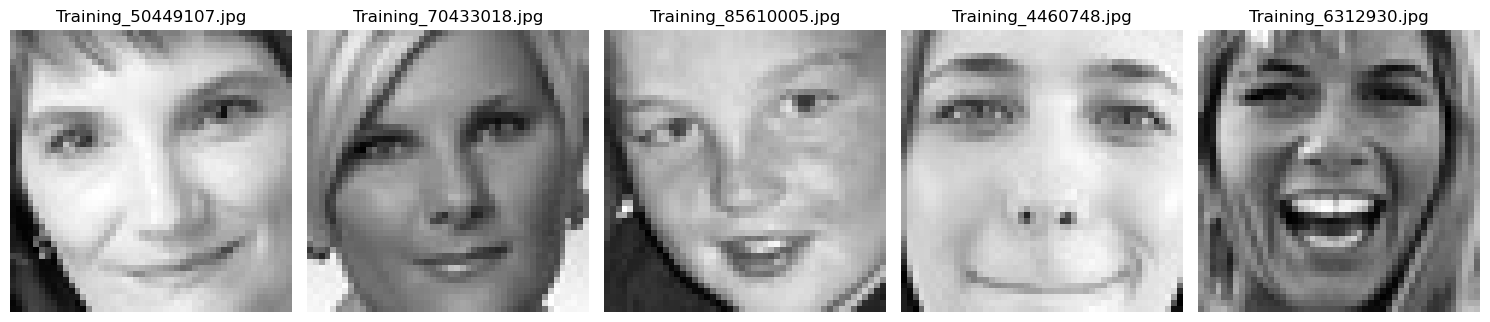

In [6]:
# Path to the happy folder
happy_dir = 'fer2013/train/happy'

# Get the list of image files
happy_images = os.listdir(happy_dir)[:5]  # Get the first 5 images

# Set up the plot
plt.figure(figsize=(15, 5))

# Loop through the images and display them
for i, image_file in enumerate(happy_images):
    # Read the image in grayscale
    image_path = os.path.join(happy_dir, image_file)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Display the image
    plt.subplot(1, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')  # Hide the axes
    plt.title(image_file)  # Show the image filename

plt.tight_layout()
plt.show();

# Image Processing

In [7]:
import os
import cv2
import numpy as np

# Path to the train directory
train_dir = 'fer2013/train'

# Initialize lists to store images and labels
images = []
labels = []

# Define the desired image size
img_size = (48, 48)  # FER2013 images are typically 48x48

# Loop through each mood folder
for mood in os.listdir(train_dir):
    mood_dir = os.path.join(train_dir, mood)
    
    # Check if it's a directory
    if os.path.isdir(mood_dir):
        for image_file in os.listdir(mood_dir):
            # Read the image in grayscale
            image_path = os.path.join(mood_dir, image_file)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            
            # Resize the image
            image = cv2.resize(image, img_size)
            
            # Append the image and label
            images.append(image)
            labels.append(mood)  # Store the mood as the label

# Convert to numpy arrays
images = np.array(images)
labels = np.array(labels)

print(f'Processed {len(images)} images from {len(os.listdir(train_dir))} classes.')

Processed 28709 images from 7 classes.


In [8]:
from sklearn.model_selection import train_test_split
# Convert to numpy arrays
X = np.array(images)
y = np.array(labels)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set: {X_train.shape[0]} images')
print(f'Validation set: {X_val.shape[0]} images')

Training set: 22967 images
Validation set: 5742 images


In [9]:
# Get unique classes in the training set
unique_classes_train = np.unique(y_train)

# Get unique classes in the validation set
unique_classes_val = np.unique(y_val)

print("Classes in Training Set:")
print(unique_classes_train)

print("\nClasses in Validation Set:")
print(unique_classes_val)

Classes in Training Set:
['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']

Classes in Validation Set:
['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


# Training the Model

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import numpy as np

# Normalize the images
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0

# Convert labels to categorical format
# Map the mood labels to integers and convert to categorical
mood_labels, y_train = np.unique(y_train, return_inverse=True)
y_train = to_categorical(y_train)

y_val = np.unique(y_val, return_inverse=True)[1]
y_val = to_categorical(y_val)

# Define the CNN model using Input layer
model = models.Sequential([
    layers.Input(shape=(48, 48, 1)),  # Input layer specifying the shape
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(mood_labels), activation='softmax')  # Number of classes
])

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,202 (1.35 MB)

 Trainable params: 355,202 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Check the shapes of the datasets
print(f"X_train shape: {X_train.shape}")  # Should be (22967, 48, 48) if grayscale
print(f"y_train shape: {y_train.shape}")  # Should be (22967, number_of_classes)

print(f"X_val shape: {X_val.shape}")      # Check validation data shapes
print(f"y_val shape: {y_val.shape}")      # Check validation labels


X_train shape: (22967, 48, 48)
y_train shape: (160769, 2)
X_val shape: (5742, 48, 48)
y_val shape: (40194, 2)


In [22]:
# Example model architecture (assuming it's a CNN for image classification)
model = Sequential()
# ... (add layers like Conv2D, MaxPooling, Flatten, etc.)
model.add(Dense(7, activation='softmax'))  # Output layer with 7 classes


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Example CNN architecture
model = Sequential()

# Add some convolutional layers (adjust filters and kernel size as needed)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add more layers if necessary
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature map to a 1D vector
model.add(Flatten())

# Add a dense layer
model.add(Dense(128, activation='relu'))  # Optional fully connected layer

# Output layer with 7 units (one for each class)
model.add(Dense(7, activation='softmax'))


/Users/reginoldkbinoy/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use categorical crossentropy for multi-class classification
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train.reshape(-1, 48, 48, 1), y_train,
                    validation_data=(X_val.reshape(-1, 48, 48, 1), y_val),
                    epochs=10,  # Adjust epochs as needed
                    batch_size=32)

print("Model training complete!")


Epoch 1/10


2024-09-26 23:33:04.398432: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


718/718 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.2856 - loss: 5.1185 - val_accuracy: 0.3480 - val_loss: 1.6387
Epoch 2/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.3934 - loss: 1.5734 - val_accuracy: 0.3734 - val_loss: 1.5825
Epoch 3/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.4450 - loss: 1.4593 - val_accuracy: 0.3901 - val_loss: 1.5641
Epoch 4/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.4955 - loss: 1.3314 - val_accuracy: 0.4108 - val_loss: 1.5840
Epoch 5/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.5610 - loss: 1.1905 - val_accuracy: 0.4190 - val_loss: 1.6038
Epoch 6/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.6246 - loss: 1.0178 - val_accuracy: 0.4244 - val_loss: 1.7145
Epoch 7/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.7027 - loss: 0.8281 - val_accuracy: 0.4277 - val_loss: 1.8483
Epoch 8/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.7561 - loss: 0.6914 - val_accurac

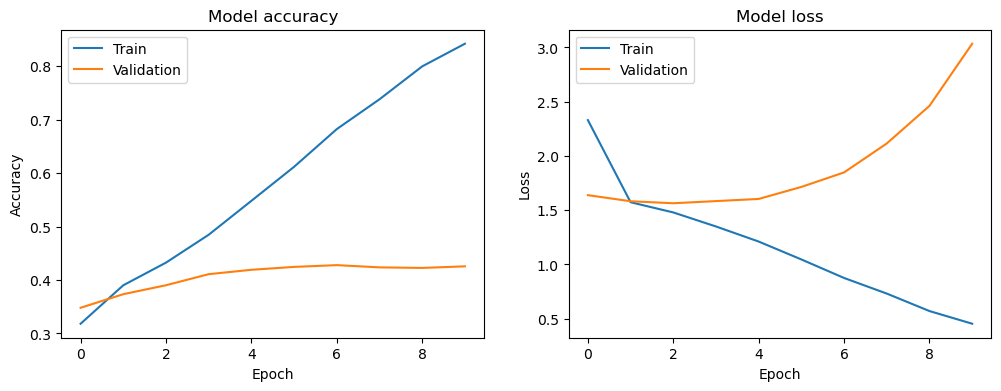

In [34]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [29]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


Training Loss: 0.3342, Training Accuracy: 0.8862
Validation Loss: 3.0340, Validation Accuracy: 0.4255


In [30]:
from tensorflow.keras.layers import Dropout
model.add(Dropout(0.5))  # Drop 50% of the neurons randomly during training

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

In [32]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [33]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


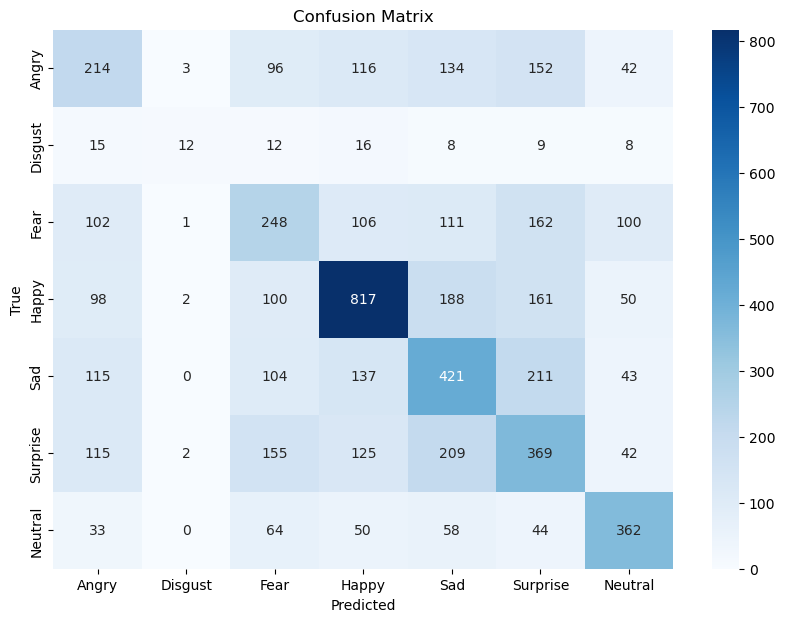

              precision    recall  f1-score   support

       Angry       0.31      0.28      0.30       757
     Disgust       0.60      0.15      0.24        80
        Fear       0.32      0.30      0.31       830
       Happy       0.60      0.58      0.59      1416
         Sad       0.37      0.41      0.39      1031
    Surprise       0.33      0.36      0.35      1017
     Neutral       0.56      0.59      0.58       611

    accuracy                           0.43      5742
   macro avg       0.44      0.38      0.39      5742
weighted avg       0.43      0.43      0.42      5742



In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Ensure that `mood_labels` contains 7 labels corresponding to your 7 classes
mood_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Predict the validation set
y_val_pred = model.predict(X_val.reshape(-1, 48, 48, 1))
y_val_pred_classes = np.argmax(y_val_pred, axis=1)  # Get predicted class
y_val_true = np.argmax(y_val, axis=1)  # Get true class

# Confusion Matrix
cm = confusion_matrix(y_val_true, y_val_pred_classes)

# Plotting the confusion matrix with emotion labels
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=mood_labels, yticklabels=mood_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_val_true, y_val_pred_classes, target_names=mood_labels))

In [38]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │           903 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,517,143 (9.60 MB)

 Trainable params: 839,047 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,678,096 (6.40 MB)

# Testing the model on Test Dataset

Selected image for prediction: PrivateTest_66131494.jpg


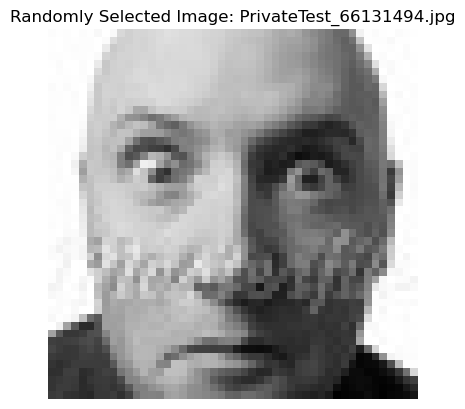

In [39]:
import os
import random
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Assuming `model` is your trained CNN model in memory
# Set up the test directory and the surprise folder path
test_dir = 'fer2013/test'
surprise_dir = os.path.join(test_dir, 'surprise')

# List all image files in the surprise folder
surprise_images = os.listdir(surprise_dir)

# Randomly select an image from the surprise folder
random_image = random.choice(surprise_images)
image_path = os.path.join(surprise_dir, random_image)

print(f"Selected image for prediction: {random_image}")
# Load and preprocess the image
image = load_img(image_path, target_size=(48, 48), color_mode='grayscale')  # Adjust target size if needed
image_array = img_to_array(image)

# Display the selected image
plt.imshow(image_array.squeeze(), cmap='gray')
plt.title(f"Randomly Selected Image: {random_image}")
plt.axis('off')  # Hide the axes
plt.show()

In [40]:
# Load and preprocess the image
image = load_img(image_path, target_size=(48, 48), color_mode='grayscale')  # Adjust target size if needed
image = img_to_array(image)
image = np.expand_dims(image, axis=0)  # Add batch dimension
image = image / 255.0  # Normalize to [0, 1]

# Make a prediction using the model
predictions = model.predict(image)
predicted_class = np.argmax(predictions)

# Mapping the predicted class to the emotion label
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
predicted_emotion = emotion_labels[predicted_class]

print(f'Predicted emotion: {predicted_emotion}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step
Predicted emotion: angry


# Importing a new image and testing our model

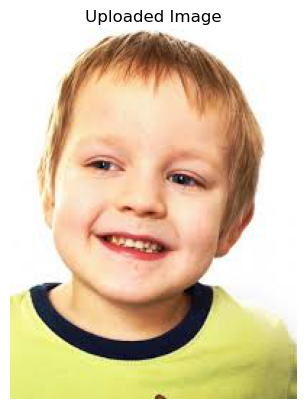

In [48]:
from PIL import Image
import matplotlib.pyplot as plt

# Path to the specific image
image_path = r'/Users/reginoldkbinoy/Desktop/LGMVIP-DataScience-Reginold/Task 10/happy.jpeg'

# Load the image using PIL
image = Image.open(image_path)

# Display the image as it is
plt.imshow(image)
plt.title("Uploaded Image")
plt.axis('off')  # Hide the axes
plt.show()

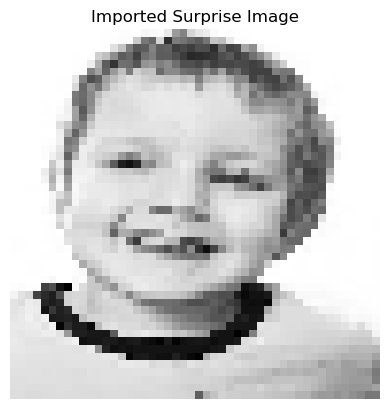

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Path to the specific image
image_path = r'/Users/reginoldkbinoy/Desktop/LGMVIP-DataScience-Reginold/Task 10/happy.jpeg'


# Load and preprocess the image
image = load_img(image_path, target_size=(48, 48), color_mode='grayscale')  # Adjust target size if needed
image_array = img_to_array(image)

# Display the image
plt.imshow(image_array.squeeze(), cmap='gray')
plt.title("Imported Surprise Image")
plt.axis('off')  # Hide the axes
plt.show()

# Preprocess the image for model prediction
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
image_array = image_array / 255.0  # Normalize to [0, 1]

# You can now use this image_array for prediction with your model
# predictions = model.predict(image_array)

In [52]:
# Make a prediction using the model
predictions = model.predict(image_array)
predicted_class = np.argmax(predictions)

# Mapping the predicted class to the emotion label
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
predicted_emotion = emotion_labels[predicted_class]

print(f'Predicted emotion: {predicted_emotion}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted emotion: angry


In [57]:

import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define a dictionary of moods and corresponding song recommendations
mood_to_songs = {
    'angry': ['Song A - Artist 1', 'Song B - Artist 2', 'Song C - Artist 3'],
    'disgust': ['Song D - Artist 4', 'Song E - Artist 5', 'Song F - Artist 6'],
    'fear': ['Song G - Artist 7', 'Song H - Artist 8', 'Song I - Artist 9'],
    'happy': ['Song J - Artist 10', 'Song K - Artist 11', 'Song L - Artist 12'],
    'sad': ['Song M - Artist 13', 'Song N - Artist 14', 'Song O - Artist 15'],
    'surprise': ['Song P - Artist 16', 'Song Q - Artist 17', 'Song R - Artist 18'],
    'neutral': ['Song S - Artist 19', 'Song T - Artist 20', 'Song U - Artist 21']
}

# Path to the specific image
image_path = r'/Users/reginoldkbinoy/Desktop/LGMVIP-DataScience-Reginold/Task 10/Sad.jpg'

# Load and preprocess the image
image = load_img(image_path, target_size=(48, 48), color_mode='grayscale')  # Adjust target size if needed
image_array = img_to_array(image)

# Preprocess the image for model prediction
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
image_array = image_array / 255.0  # Normalize to [0, 1]

# Make a prediction using the model
predictions = model.predict(image_array)
predicted_class = np.argmax(predictions)

# Mapping the predicted class to the emotion label
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
predicted_emotion = emotion_labels[predicted_class]

print(f'Predicted emotion: {predicted_emotion}')

# Recommend a song based on the detected mood
if predicted_emotion in mood_to_songs:
    recommended_song = random.choice(mood_to_songs[predicted_emotion])
    print(f"Recommended song for {predicted_emotion} mood: {recommended_song}")
else:
    print("No songs available for this mood.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Predicted emotion: angry
Recommended song for angry mood: Song A - Artist 1


# Thank You